In [102]:
#libraries
library(tidyverse)
library(RColorBrewer)
library(dplyr)

In [103]:
path_files <- "C://Users//jziac//OneDrive//Documents//programovani//projekty//elite//data//data_report//"

In [104]:
players_file_name <- "nhl_player_stats.csv"

In [105]:
#graphics set up
gg_size <- 11
plot_size <- 7
size_multiplier <- 2
options(repr.plot.width = plot_size*size_multiplier, repr.plot.height = plot_size*size_multiplier)
def_plot_setup <- theme_light() + 
theme(text=element_text(size = gg_size*size_multiplier,  family = "helvetica"))
my_colours <- brewer.pal(n = 9,"Paired")

In [201]:
create_comparative_measure <- function(df, position, reg_seas, stat){
if (position == "defense") {
  match <- "D"
}
else if (position == "attack") {
  match <-"W|C"
}
else if (position == "all") {
  match <- "W|C|D"
}

season_values <- df %>%
  filter(grepl(match, position)) %>%
  filter(regular_season == reg_seas) %>%
  group_by(season) %>%
  summarize(
    mad = mad({{ stat }}, na.rm=TRUE), median = median({{ stat }}, 
    na.rm = TRUE), median_games = median(gp, na.rm = TRUE)
  )

dominance_df <- player_data %>%
  filter(grepl(match, position)) %>%
  filter(regular_season == reg_seas) %>%
  left_join(season_values, by = "season") %>%
  filter(gp >= median_games) %>%
  mutate(measure = ({{ stat }} - median)/mad) %>%
  arrange(desc(measure))  %>%
  select(
    name, position, active, gp, g, a, tp, plus_minus, 
    season, nationality, avg_p, avg_g, avg_a, mad, median, 
    median_games, measure, season_id
  ) 
dominance_df$rank <- 1:nrow(dominance_df)
dominance_df <- dominance_df %>%
relocate(rank)

dominance_df
}

create_career_measure<-function(df){
career_measure <- df %>%
  group_by(name) %>%
  summarize(measure = mean(measure, na.rm = TRUE), n = n()) %>%
  filter(n >= median(n))  %>%
  arrange(desc(measure))
  career_measure
}

In [107]:
#constants
big_six <- c("Sweden", "Canada", "Russia", "Czechia", "Finland", "Canada", "USA")

In [202]:
#loading players data set
player_data <- read_csv(paste(path_files, players_file_name, sep=""))
player_data <- player_data %>%
  mutate(season_id = season_id - min(season_id) + 1) %>%
  mutate(avg_g = g/gp, avg_p = tp/gp) %>%
  group_by(
    u_id, name, season_id, season, handedness, 
    nationality, active, position, regular_season
    ) %>%
  summarize(
    gp = sum(gp, na.rm = TRUE), 
    g = sum(g, na.rm = TRUE), 
    a = sum(a, na.rm = TRUE), 
    tp = sum(tp, na.rm = TRUE), 
    plus_minus = sum(plus_minus, na.rm = TRUE), 
    pm = sum(pm, na.rm = TRUE)
  ) %>%
  mutate(avg_g = g/gp, avg_p = tp/gp, avg_a = a/gp)

New names:
* `id` -> `id...1`
* `id` -> `id...19`
* `id` -> `id...32`
* `id` -> `id...34`
Rows: 100078 Columns: 35
-- Column specification --------------------------------------------------------
Delimiter: ","
chr   (7): name, position, handedness, contract_end, captaincy, nationality,...
dbl  (26): id...1, u_id, active, age, cap_hit, signed_nhl, drafted, height, ...
lgl   (1): catches
date  (1): date_birth

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
`summarise()` has grouped output by 'u_id', 'name', 'season_id', 'season',
'handedness', 'nationality', 'active', 'position'. You can override using the
`.groups` argument.


In [178]:
season_regular_counts <- player_data %>%
  filter(regular_season == 1 & gp != 0) %>%
  group_by(season_id) %>%
  summarize(season_n = n())

season_playoff_counts <- player_data %>%
  filter(regular_season == 0 & gp != 0) %>%
  group_by(season_id) %>%
  summarize(season_n = n())


# Analysis of NHL Seasons from 1917 to 2023

## Nationalities Shares of Players

`summarise()` has grouped output by 'season_id'. You can override using the
`.groups` argument.
Warning message:
"Removed 6 rows containing missing values (`geom_line()`)."
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds

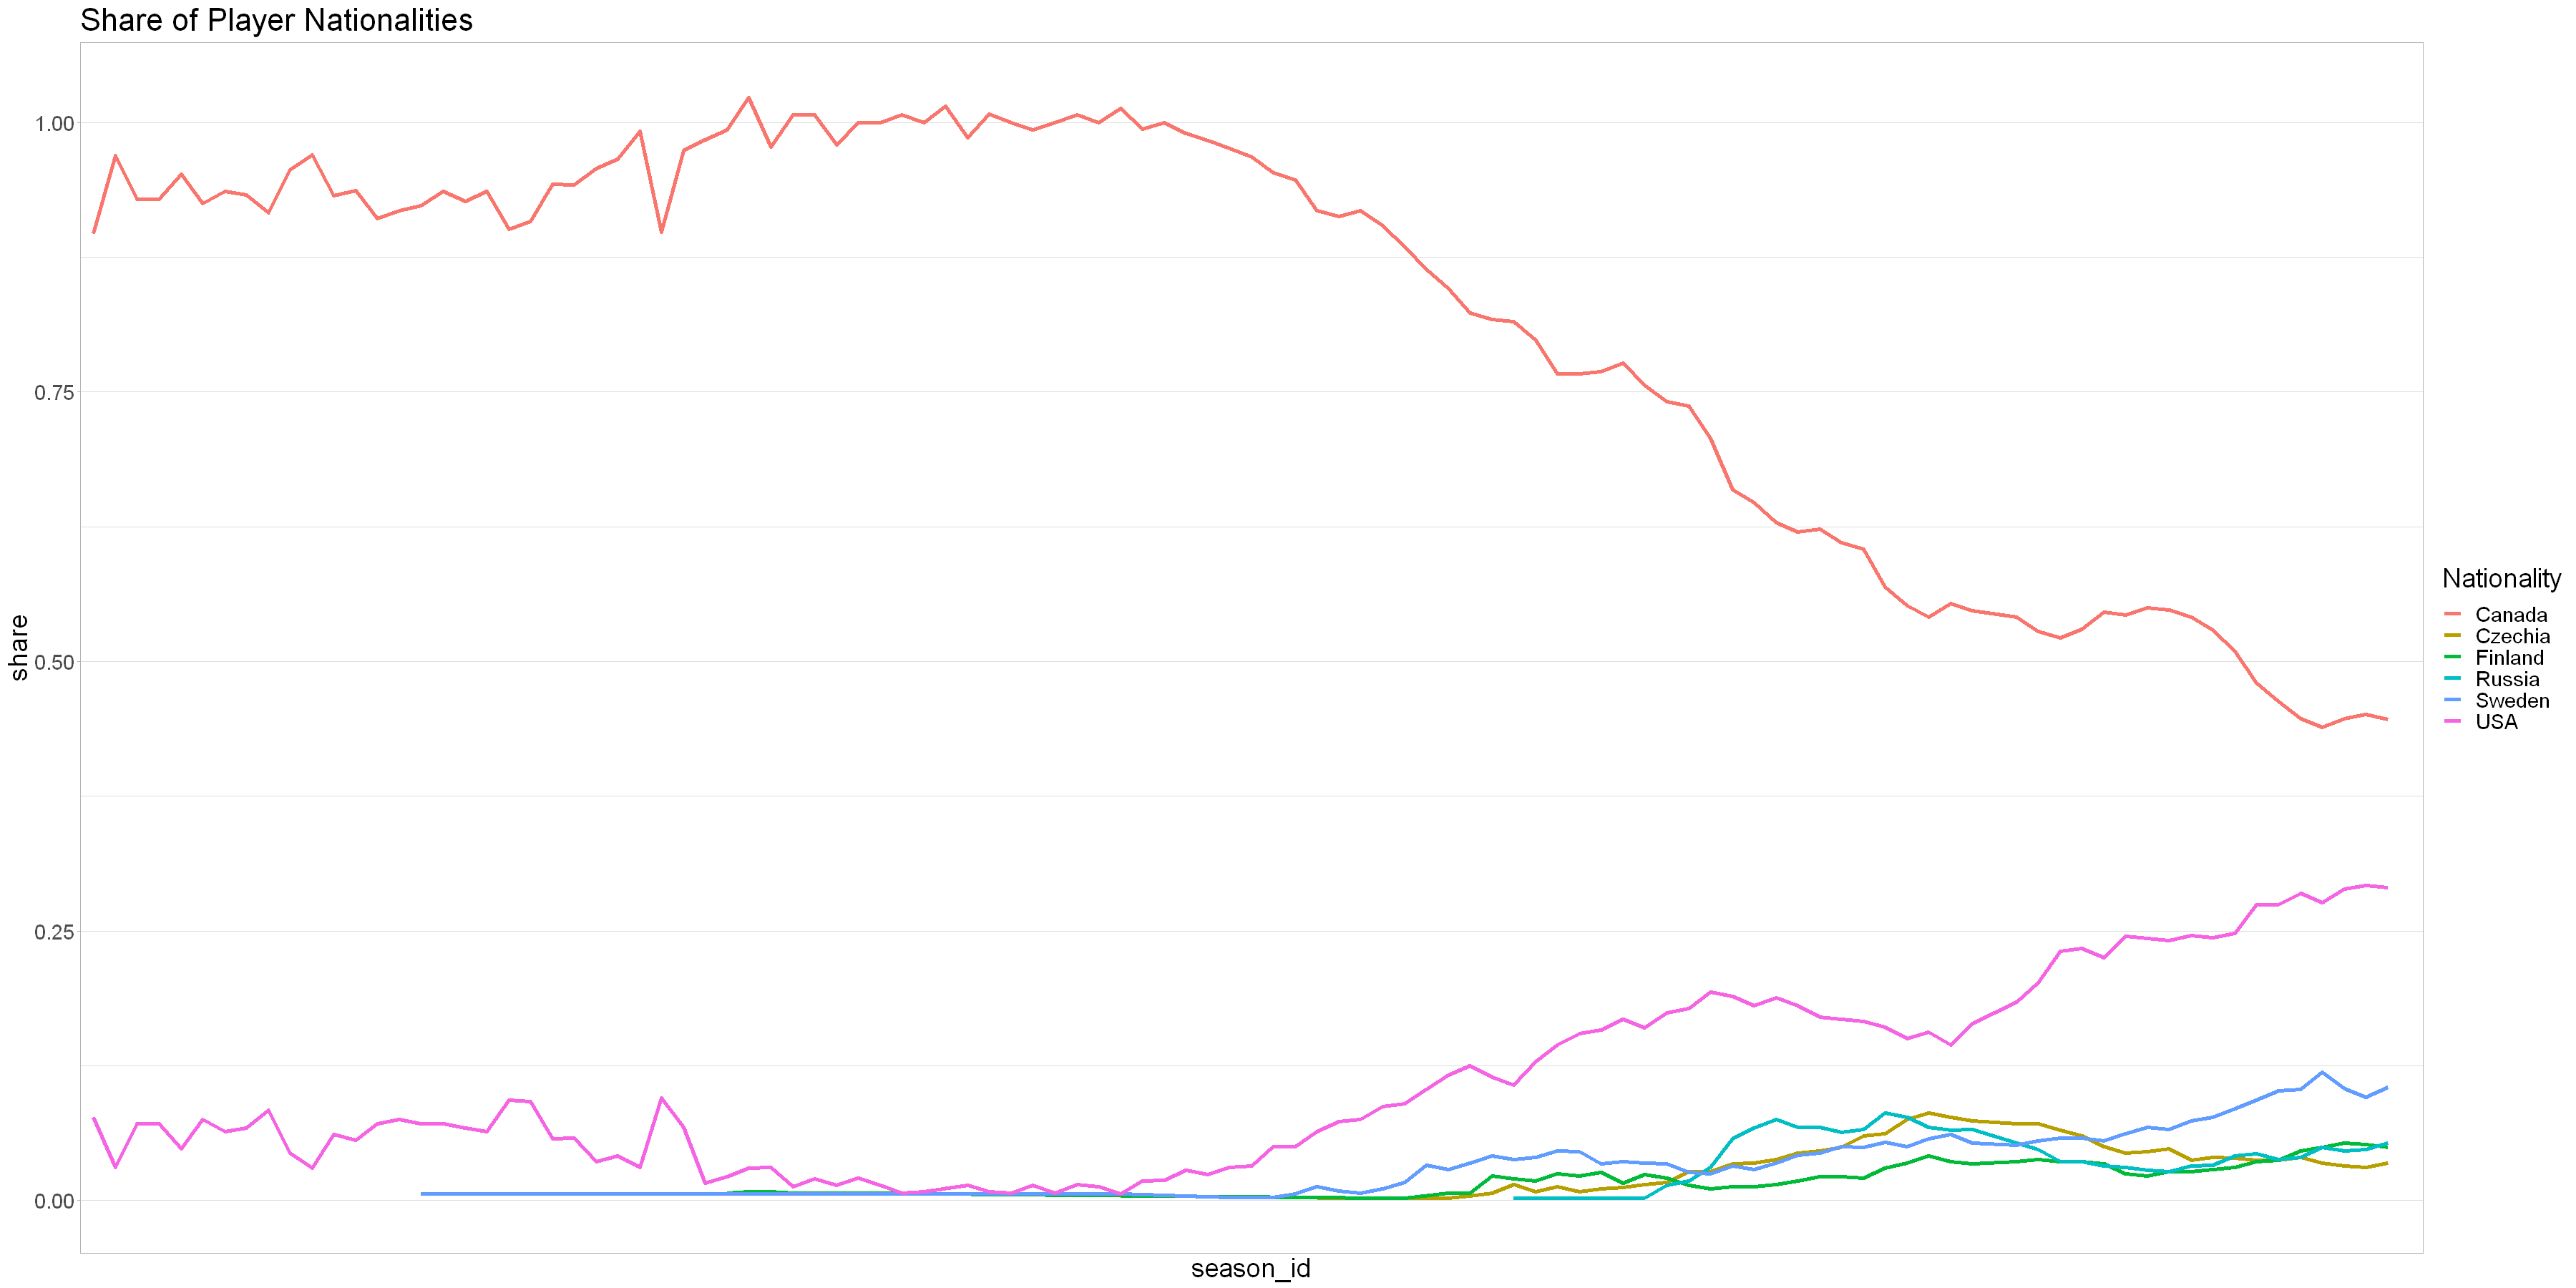

In [203]:
player_data %>%
  filter(regular_season == 1) %>%
  group_by(season_id, nationality) %>%
  summarize(n = n()) %>%
  left_join(season_regular_counts, by = "season_id") %>%
  filter(nationality %in% big_six) %>%
  mutate(share = round(n/season_n, 3)) %>%
  ggplot(., aes(x = season_id, y = share, color = nationality)) +
  geom_line(size = 1.5) + 
  labs(title = "Share of Player Nationalities", color="Nationality") +
  scale_x_discrete(breaks = 1:12, labels = 1:12) + 
  scale_fill_manual(values = my_colours) +
  def_plot_setup



Warning message:
"Removed 6 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 6 rows containing missing values (`geom_point()`)."
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot

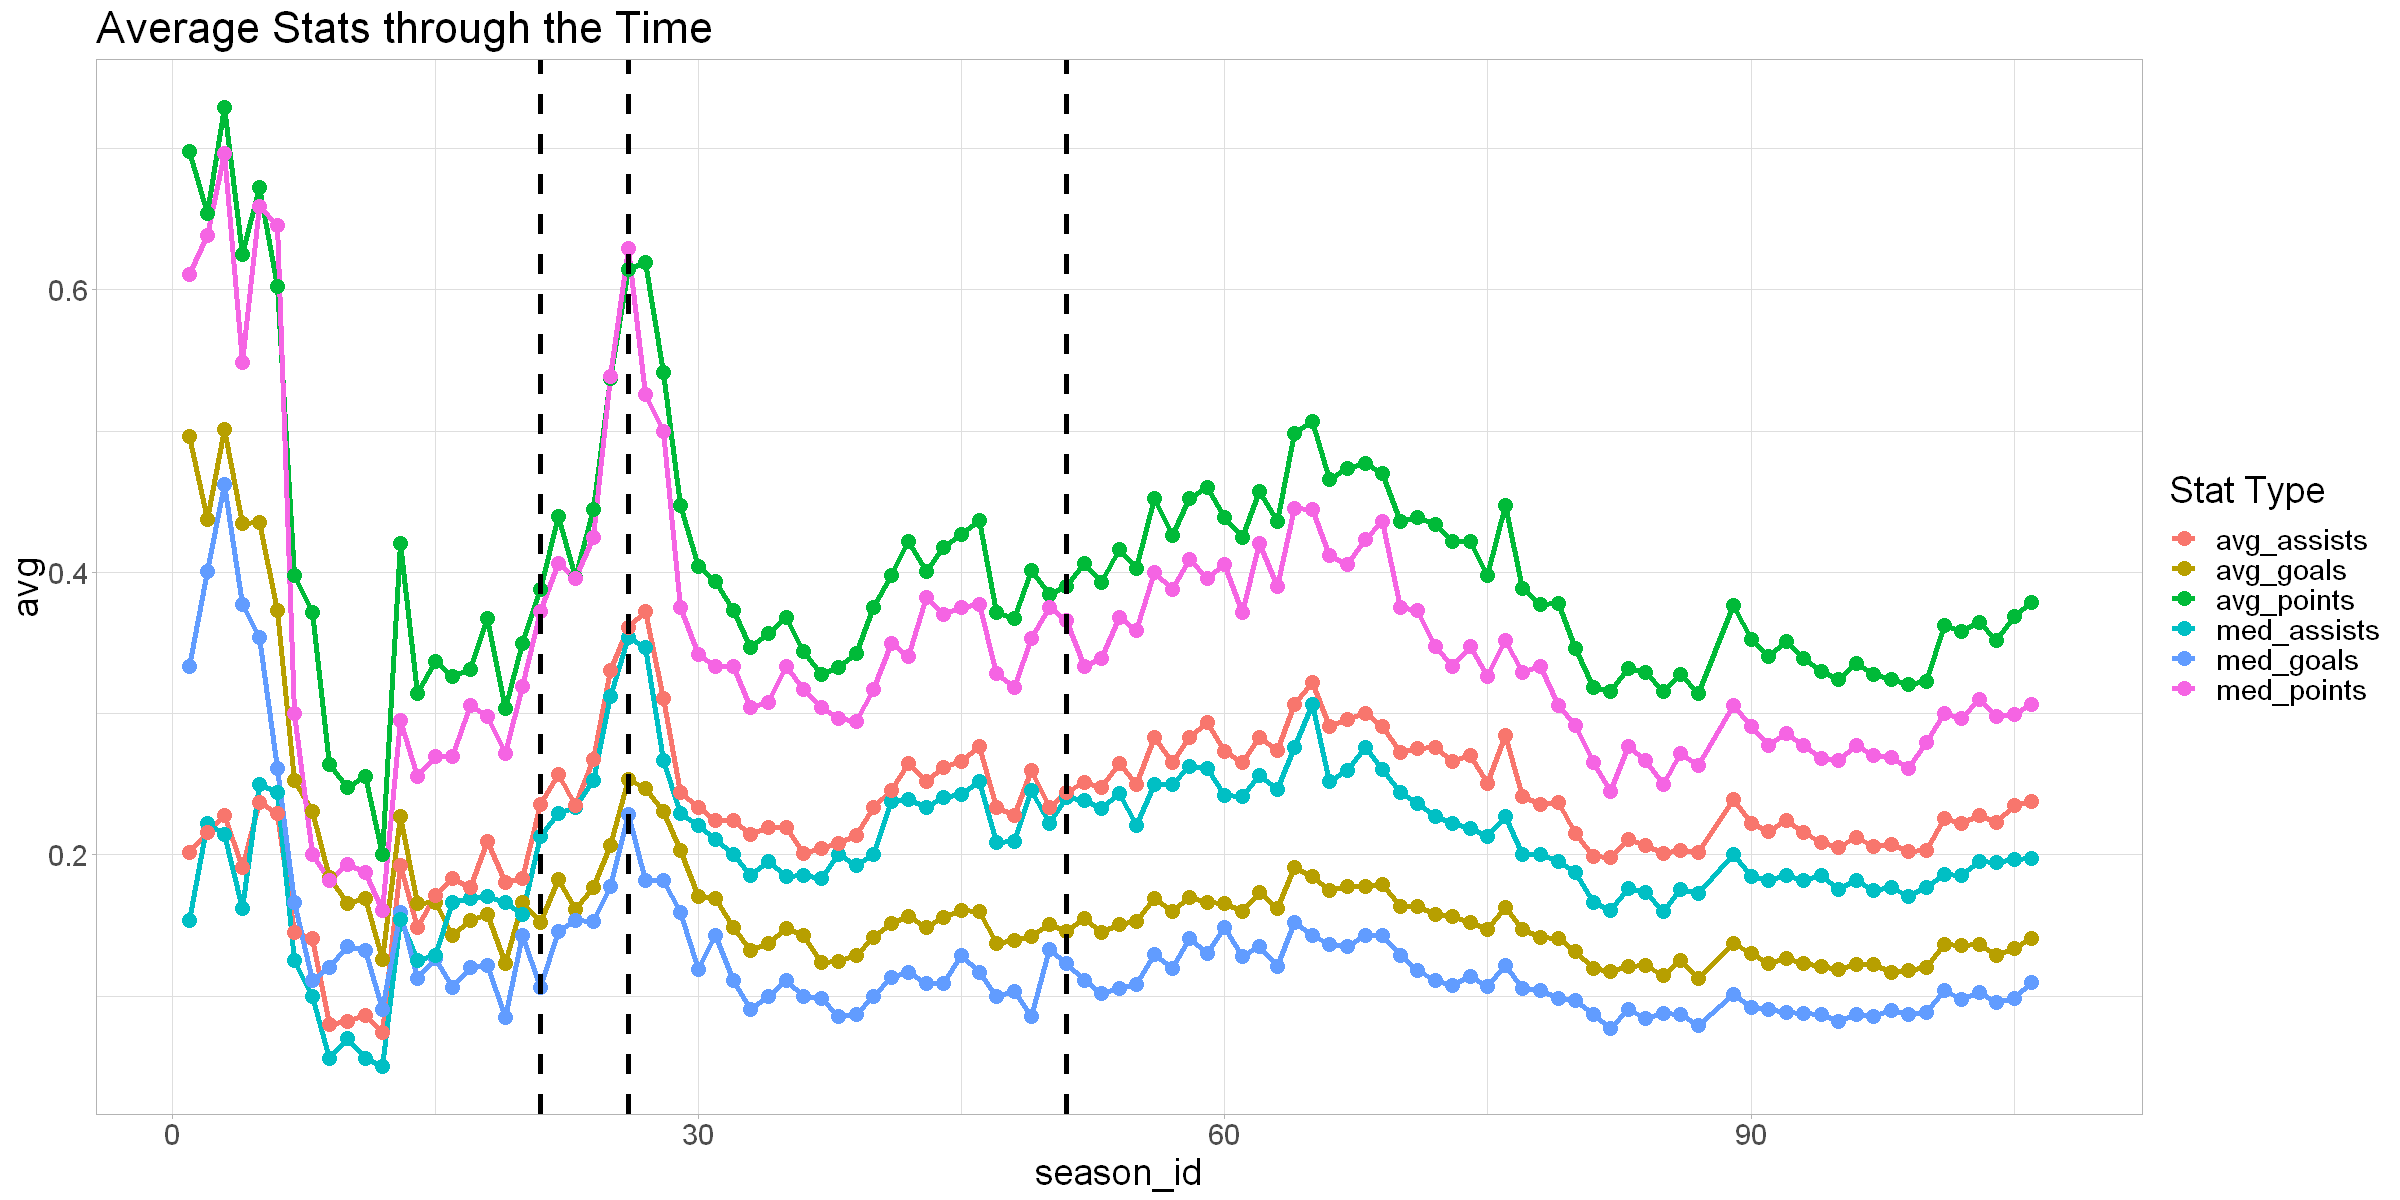

In [185]:
options(repr.plot.width=20, repr.plot.height=10)
player_data %>%
  filter(regular_season==1) %>%
  group_by(season_id) %>%
  summarize(
    avg_goals = mean(avg_g, na.rm=TRUE), 
    avg_points = mean(avg_p, na.rm=TRUE), 
    med_goals = median(avg_g, na.rm = TRUE), 
    med_points = median(avg_p, na.rm=TRUE), 
    med_assists = median(avg_a, na.rm = TRUE), 
    avg_assists = mean(avg_a, na.rm = TRUE)
    ) %>%
  pivot_longer(!season_id, names_to = "type_stat", values_to = "avg") %>%
  ggplot(., aes(x = season_id, y = avg, colour = type_stat)) +
  geom_line(size = 1.5) + 
  geom_point(size = 4) + 
  labs(title= "Average Stats through the Time", color="Stat Type") +
  geom_vline(xintercept = 21, size = 1.5, linetype = "dashed") +
  geom_vline(xintercept = 26, size = 1.5, linetype = "dashed") +
  geom_vline(xintercept = 51, size = 1.5, linetype = "dashed") + 
  scale_fill_manual(values = my_colours) +
  def_plot_setup 

### Dominant Player Performances

#### Distribution of Seasonal Points Per Game

Warning message:
"Removed 1135 rows containing non-finite values (`stat_density()`)."
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font databas

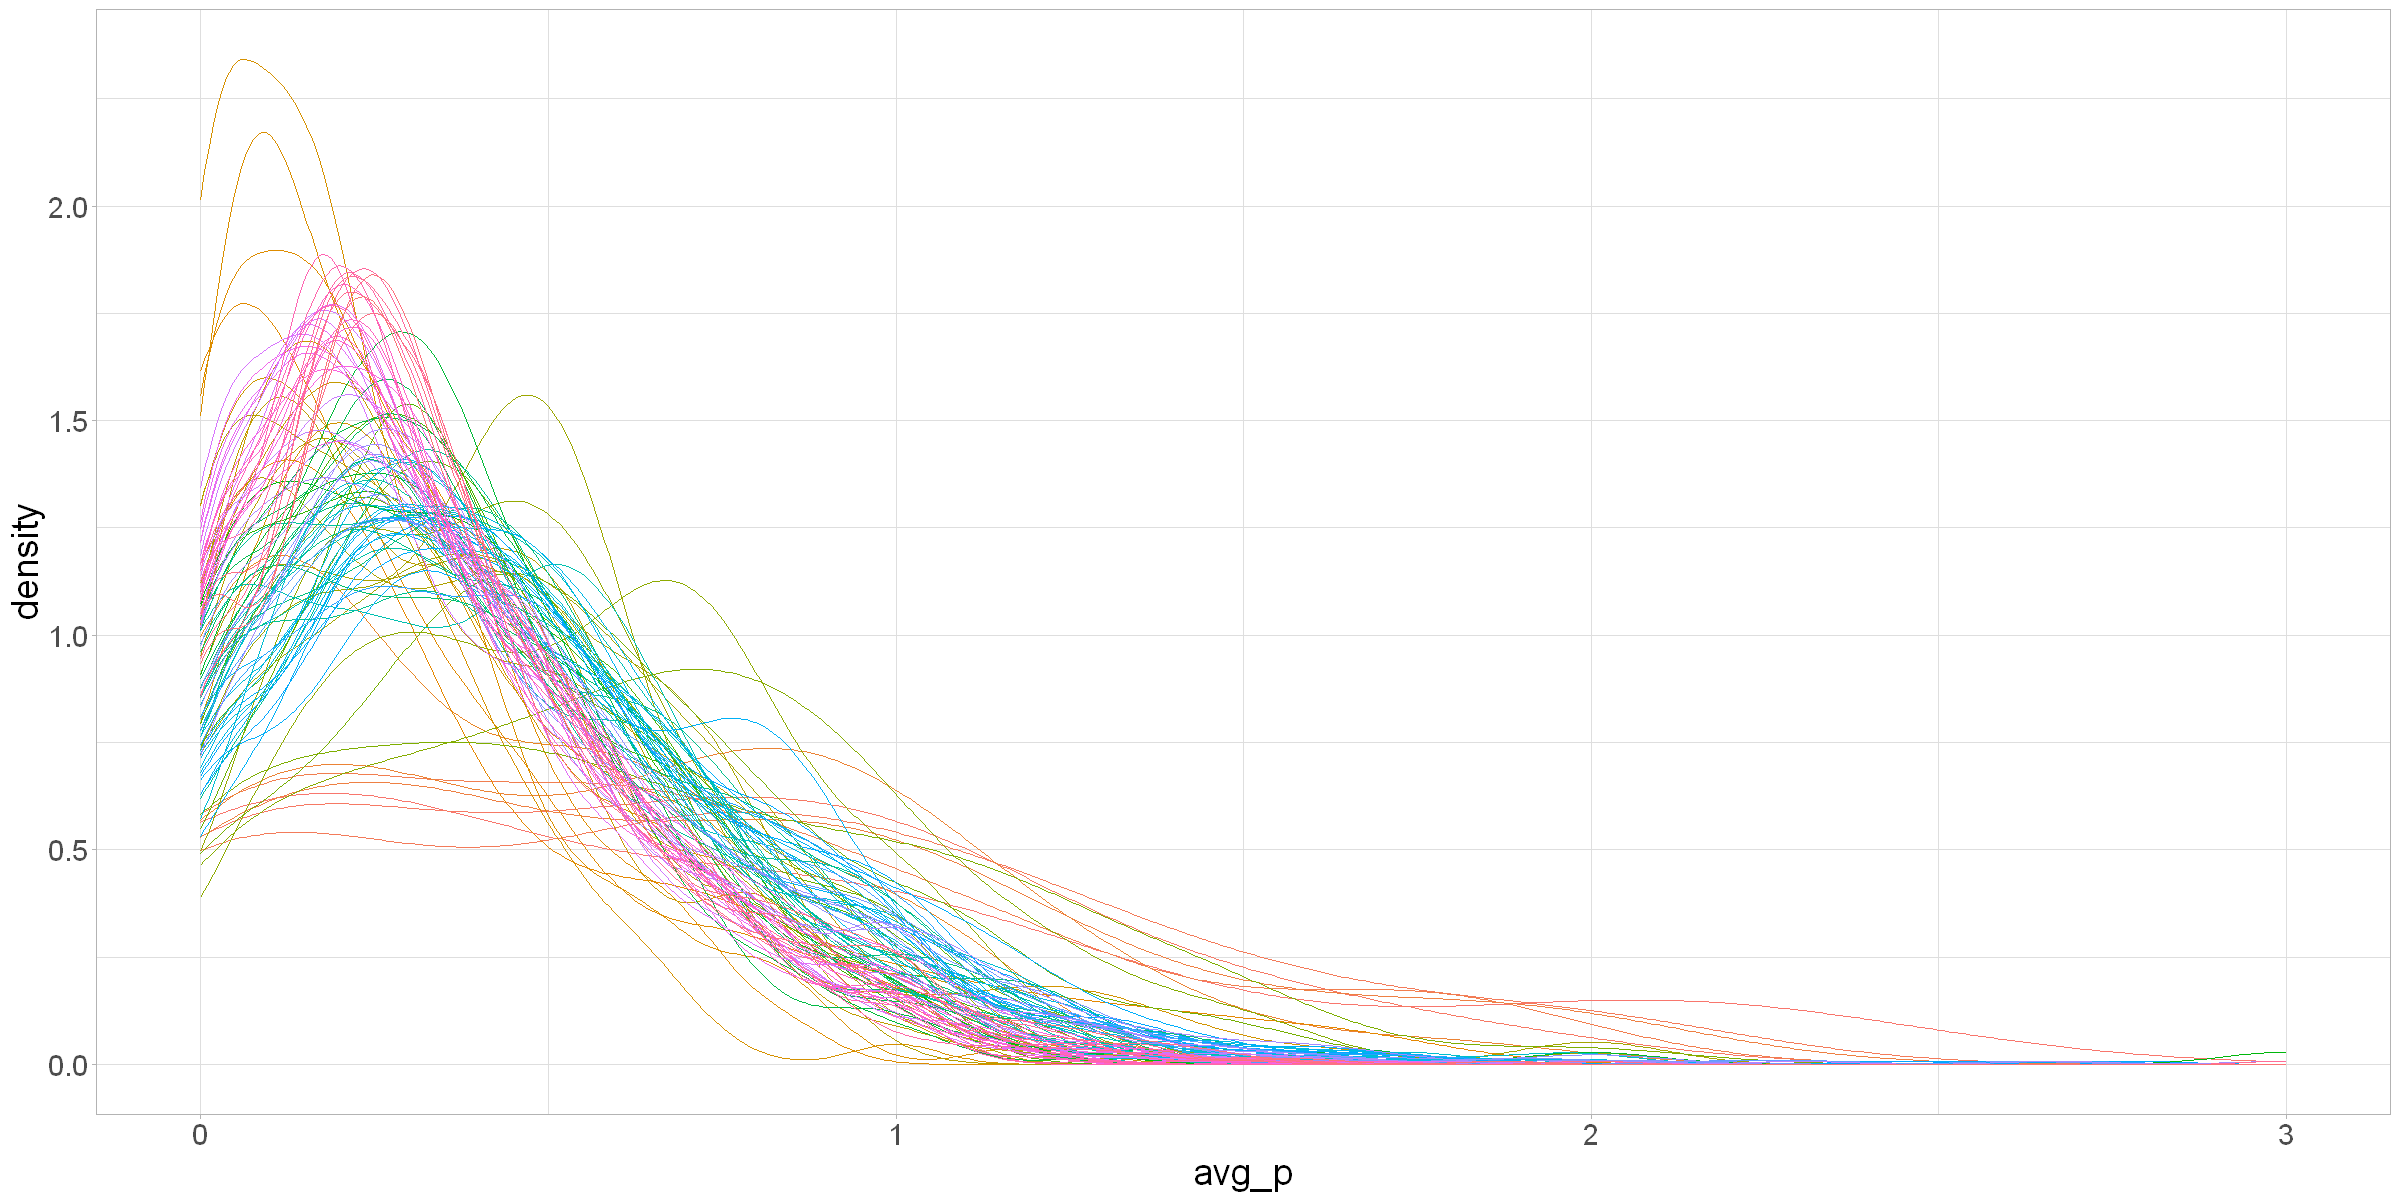

In [186]:
player_data %>%
  filter(regular_season == 1) %>%
  ggplot(., aes(x = avg_p, colour = season)) + 
  geom_density() + 
  def_plot_setup + 
  theme(legend.position = 'none') 

#### Points Per Game - Forwards

##### Best Seasons

In [189]:
dominance_p_f <- create_comparative_measure(player_data, "attack", 1, avg_p)

Adding missing grouping variables: `u_id`, `handedness`


##### Career Highs

In [205]:
career_p_dominance_f <- create_career_measure(dominance_p_f)
head(career_p_dominance_f, 10)

name,measure,n
<chr>,<dbl>,<int>
Mario Lemieux,4.621503,11
Connor McDavid,4.536532,8
Wayne Gretzky,4.277086,19
Leon Draisaitl,3.361789,9
Nikita Kucherov,3.165402,8
Sidney Crosby,3.131641,14
Peter Forsberg,3.076102,7
Yevgeni Malkin,3.068862,12
Auston Matthews,3.050040,7


Warning message:
"Removed 3 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 3 rows containing missing values (`geom_point()`)."
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot

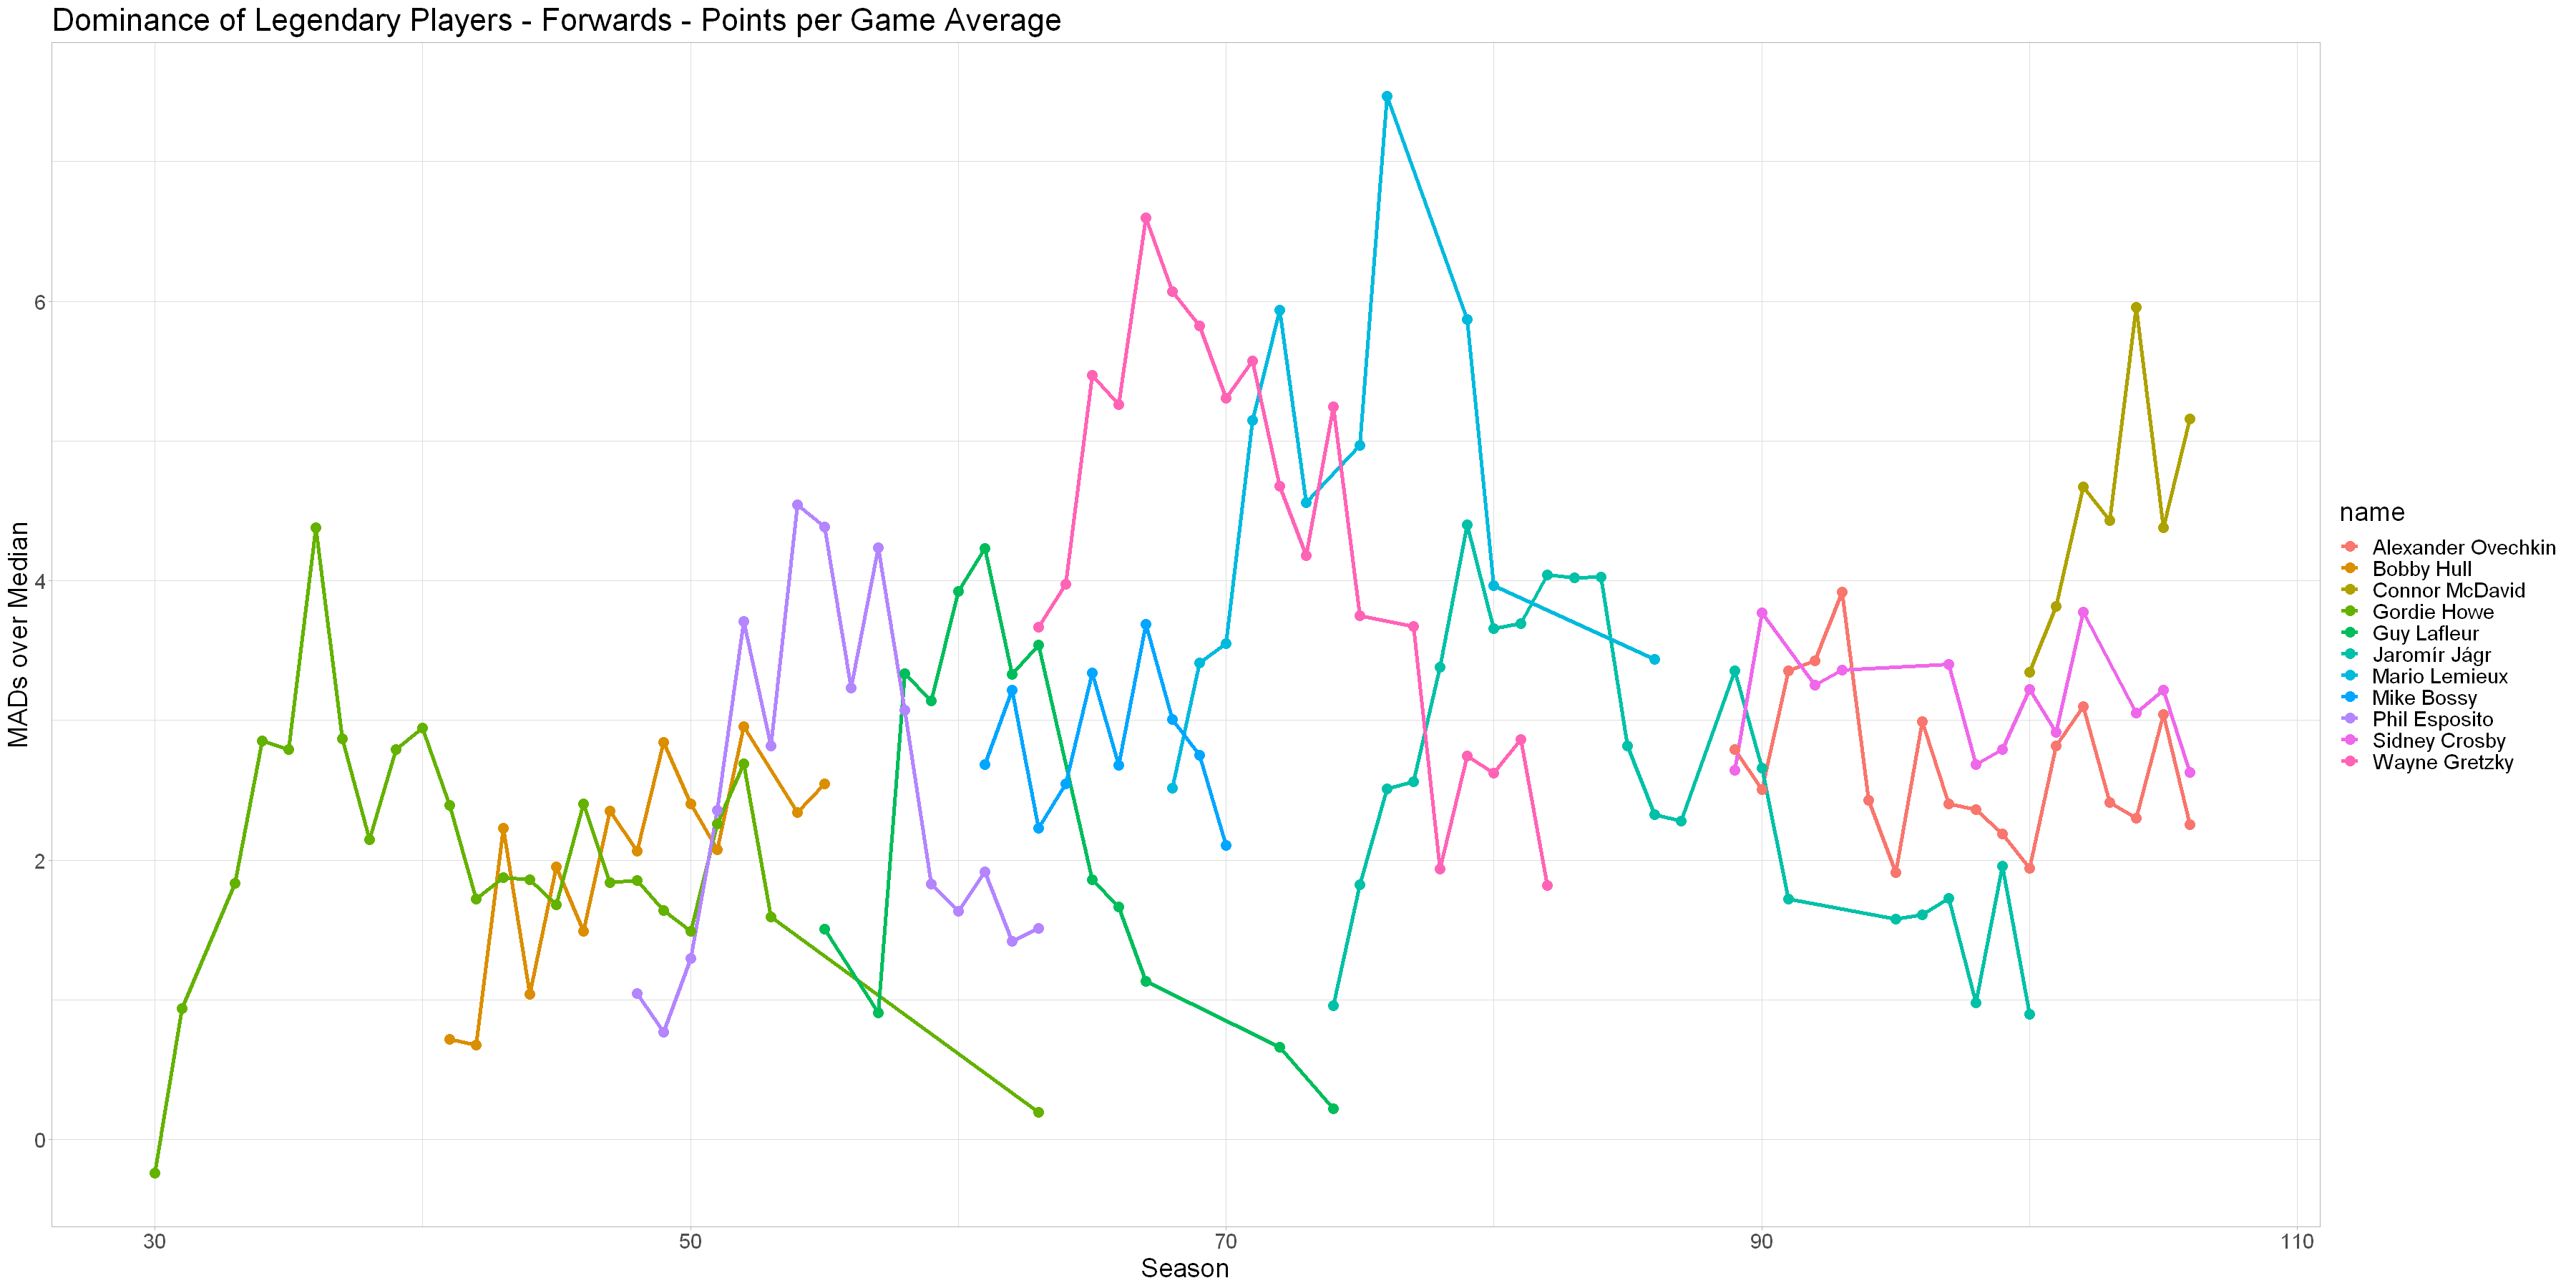

In [207]:
options(repr.plot.width = 30, repr.plot.height = 15)
forward_legends <- c("Mario Lemieux", "Wayne Gretzky", "Gordie Howe", "Connor McDavid", "Jaromír Jágr", "Sidney Crosby", "Mike Bossy", "Phil Esposito", "Bobby Hull", "Guy Lafleur", "Alexander Ovechkin")
dominance_p_f %>%
  filter(name %in% forward_legends) %>%
  ggplot(., aes(x = season_id, y = measure, colour = name, group = name)) + 
  labs(
    title = "Dominance of Legendary Players - Forwards - Points per Game Average", 
    y = "MADs over Median", 
    x = "Season"
    ) + 
  geom_line(size = 1.5) + 
  geom_point(size = 4) + 
  def_plot_setup 



#### Distribution of Seasonal Goals per Game

Warning message:
"Removed 21 rows containing non-finite values (`stat_density()`)."


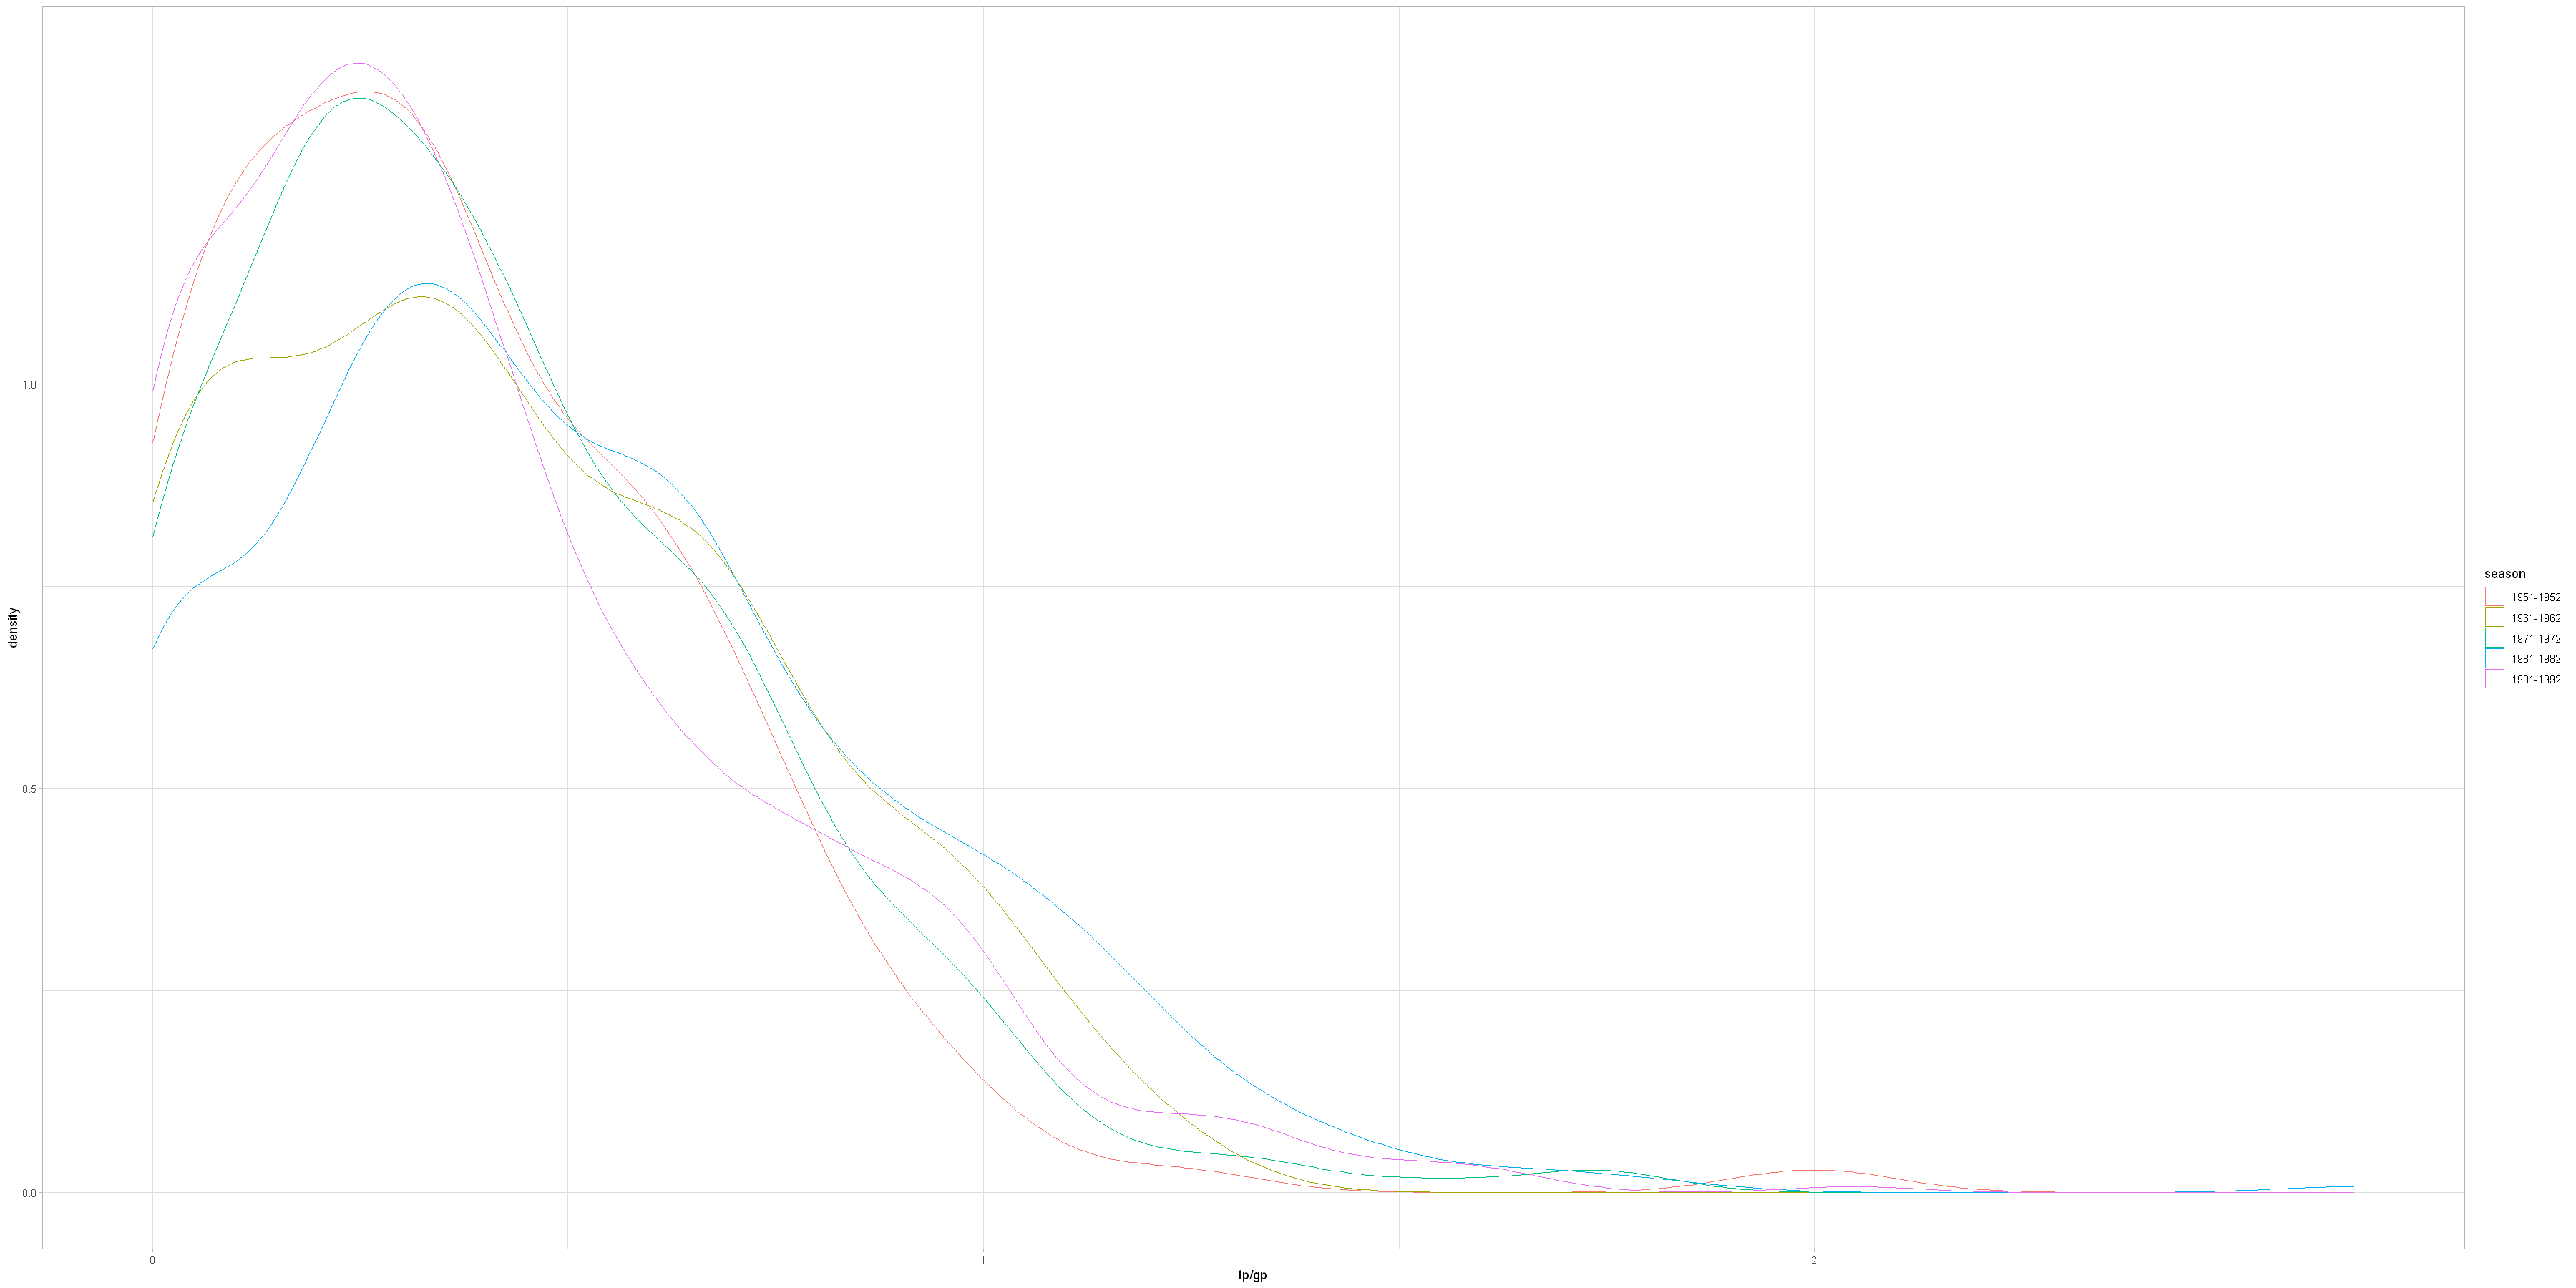

In [236]:
data %>%
  filter(regular_season == 1) %>%
  filter(season_id %in% c(35, 45, 55, 65, 75)) %>%
  ggplot(., aes(x = tp/gp, colour=season)) + 
  geom_density() + 
  theme_light()

#### Goals Per Game - Forwards

##### Best Seasons

In [208]:
dominance_g_f <- create_comparative_measure(player_data, "attack", 1, avg_g)
head(dominance_g_f, 10)


Adding missing grouping variables: `u_id`, `handedness`


rank,u_id,handedness,name,position,active,gp,g,a,tp,...,season,nationality,avg_p,avg_g,avg_a,mad,median,median_games,measure,season_id
<int>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,9679,R,Mario Lemieux,C,0,60,69,91,160,...,1992-1993,Canada,2.666667,1.1500000,1.5166667,0.1479732,0.1636364,60.0,6.665825,76
2,9678,L,Wayne Gretzky,C,0,74,87,118,205,...,1983-1984,Canada,2.770270,1.1756757,1.5945946,0.1709046,0.2013514,59.0,5.700985,67
3,21341,R,Brett Hull,RW,0,78,86,45,131,...,1990-1991,USA,1.679487,1.1025641,0.5769231,0.1638399,0.1694915,53.0,5.695028,74
4,9679,R,Mario Lemieux,C,0,70,69,92,161,...,1995-1996,Canada,2.300000,0.9857143,1.3142857,0.1477781,0.1538462,59.5,5.629170,79
5,54041,R,Babe Dye,RW,0,29,38,8,46,...,1924-1925,Canada,1.586207,1.3103448,0.2758621,0.2081483,0.1403941,27.0,5.620756,8
6,21327,L,Alexander Mogilny,RW,0,77,76,51,127,...,1992-1993,Russia,1.649351,0.9870130,0.6623377,0.1479732,0.1636364,60.0,5.564362,76
7,9679,R,Mario Lemieux,C,0,76,85,114,199,...,1988-1989,Canada,2.618421,1.1184211,1.5000000,0.1730197,0.1690141,55.0,5.487276,72
8,2683,R,Teemu Selänne,RW,0,84,76,56,132,...,1992-1993,Finland,1.571429,0.9047619,0.6666667,0.1479732,0.1636364,60.0,5.008511,76
9,21341,R,Brett Hull,RW,0,73,70,39,109,...,1991-1992,USA,1.493151,0.9589041,0.5342466,0.1645461,0.1515152,49.0,4.906763,75


##### Highest Career Averages

In [211]:
career_g_dominance_f <- create_career_measure(dominance_g_f)
head(career_g_dominance_f, 20)

name,measure,n
<chr>,<dbl>,<int>
Mario Lemieux,3.887398,11
Auston Matthews,3.603447,7
Alexander Ovechkin,3.403717,19
Mike Bossy,3.273595,10
Pavel Bure,3.254599,9
David Pastrnak,3.007571,8
Connor McDavid,2.980707,8
Brett Hull,2.845860,16
Eric Lindros,2.813720,8


##### Best Players Carreer Comparison

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"

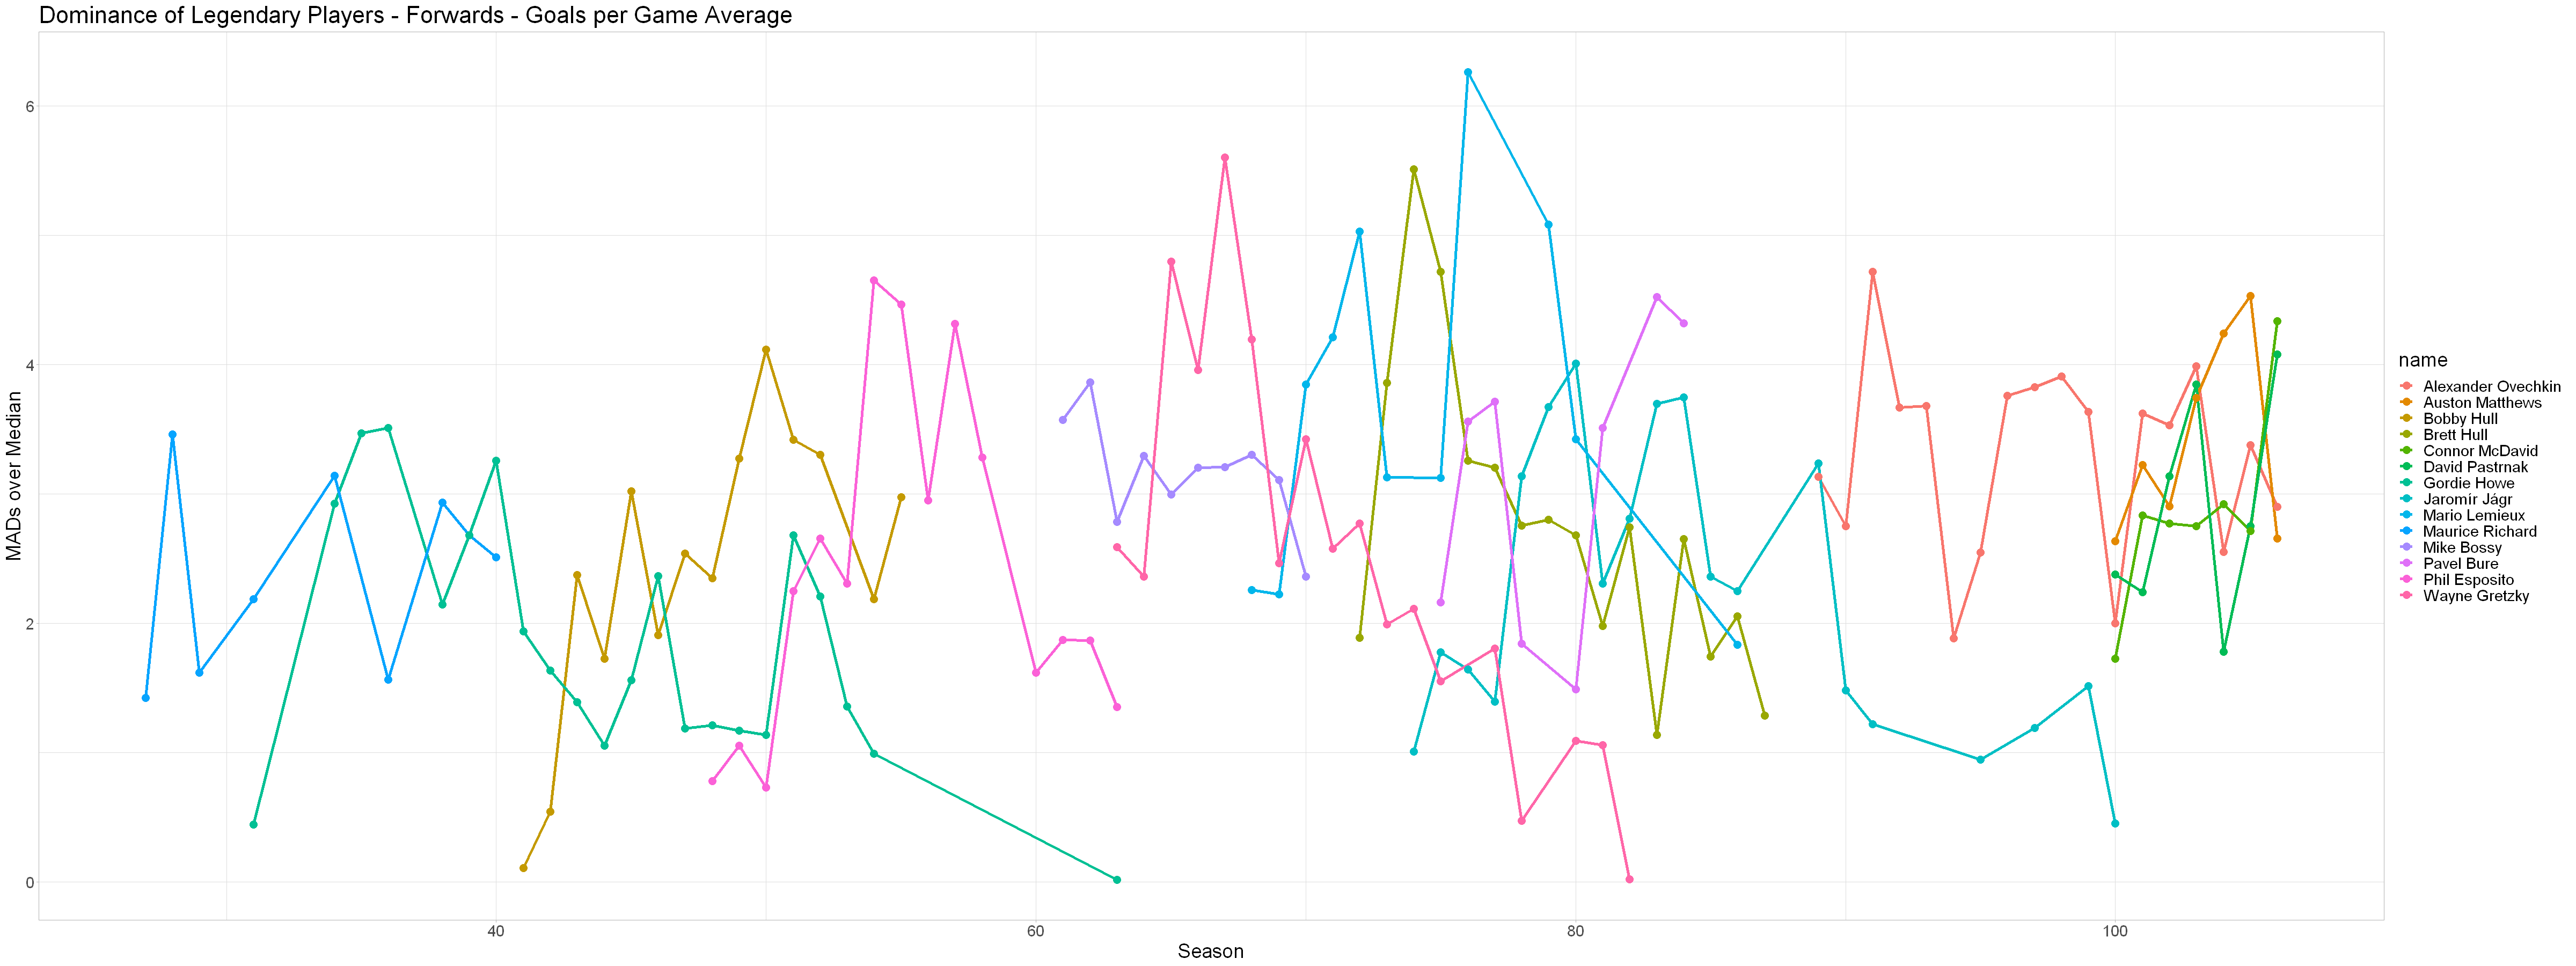

In [90]:
options(repr.plot.width = 40, repr.plot.height = 15)
forward_legends <- c("Mario Lemieux", "Wayne Gretzky", "Gordie Howe", "Connor McDavid", "Pavel Bure", 
"David Pastrnak", "Mike Bossy", "Phil Esposito", "Bobby Hull", "Alexander Ovechkin", "Brett Hull", "Maurice Richard", 
"Jaromír Jágr", "Auston Matthews")
dominance_g_f %>%
  filter(name %in% forward_legends) %>%
  ggplot(., aes(x = season_id, y = measure, colour = name, group = name)) + 
  labs(
    title="Dominance of Legendary Players - Forwards - Goals per Game Average", 
    y="MADs over Median", 
    x="Season"
  ) + 
  geom_line(size = 1.5) + 
  geom_point(size = 4)  + 
  def_plot_setup 

#### Points Per Game - Defenders

##### Best Seasons

In [93]:
dominance_p_d <- create_comparative_measure(player_data, "defense", 1, avg_p)
head(dominance_p_d, 20)

rank,name,position,active,gp,g,a,tp,plus_minus,season,team_id,nationality,avg_p,avg_g,mad,median,median_games,measure,season_id
<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bobby Orr,D,0,74,32,90,122,84,1973-1974,137,Canada,1.648649,0.4324324,0.1684773,0.2500000,60.0,8.301705,57
2,Bobby Orr,D,0,63,29,72,101,56,1972-1973,137,Canada,1.603175,0.4603175,0.1742705,0.2500000,62.5,7.764793,56
3,Bobby Orr,D,0,80,46,89,135,80,1974-1975,137,Canada,1.687500,0.5750000,0.1824738,0.2773504,59.0,7.727954,58
4,Bobby Orr,D,0,76,33,87,120,54,1969-1970,137,Canada,1.578947,0.4342105,0.1820737,0.2118590,56.0,7.508435,53
5,Bobby Orr,D,0,78,37,102,139,124,1970-1971,137,Canada,1.782051,0.4743590,0.2182182,0.2380952,57.0,7.075286,54
6,Dit Clapper,D/F,0,44,41,20,61,NA,1929-1930,137,Canada,1.386364,0.9318182,0.1762178,0.1975610,39.5,6.746212,13
7,Erik Karlsson,D,1,82,25,76,101,-26,2022-2023,55,Sweden,1.231707,0.3048780,0.1520615,0.2307692,46.0,6.582454,106
8,Bobby Orr,D,0,76,37,80,117,86,1971-1972,137,Canada,1.539474,0.4868421,0.2188461,0.2241852,54.5,6.010107,55
9,Cale Makar,D,1,60,17,49,66,16,2022-2023,5137,Canada,1.100000,0.2833333,0.1520615,0.2307692,46.0,5.716309,106


##### Highest Career Averages

In [212]:
career_p_dominance_d <- create_career_measure(dominance_p_d)
head(career_p_dominance_d, 10)

name,measure,n
<chr>,<dbl>,<int>
Bobby Orr,6.316375,8
Cale Makar,4.663912,4
Paul Coffey,3.960283,15
Quinn Hughes,3.656036,4
Raymond Bourque,3.495245,21
Erik Karlsson,3.481266,13
Brian Leetch,3.440680,13
Adam Fox,3.433012,4
Al MacInnis,3.364472,17


##### Comaprison of Legendary Players

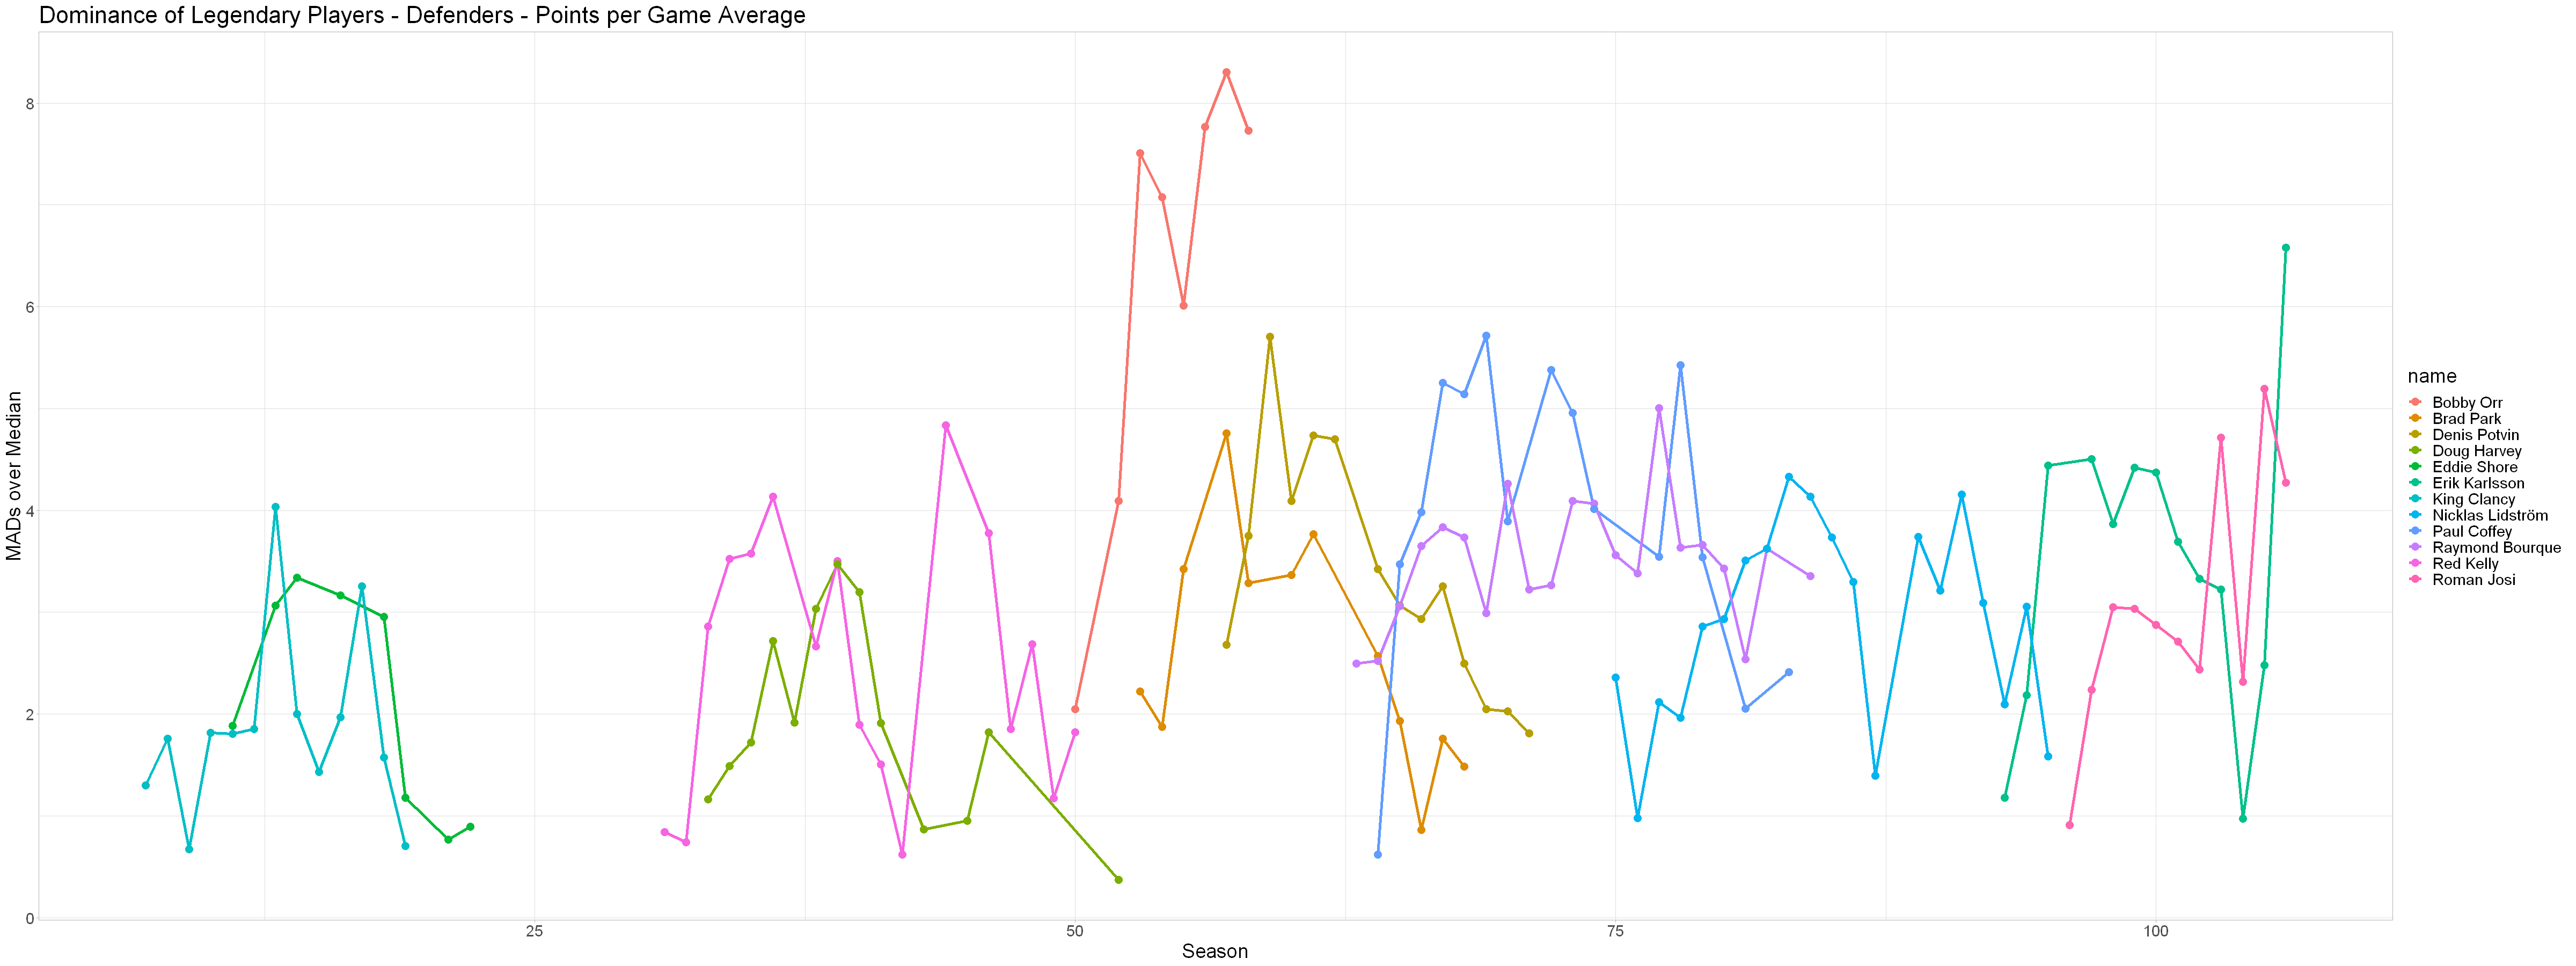

In [227]:
options(repr.plot.width = 40, repr.plot.height = 15)
defense_legends <- c("Bobby Orr", "Paul Coffey", "Raymond Bourque", "Erik Karlsson", "Denis Potvin", "Roman Josi", "Red Kelly", "Nicklas Lidström", "Doug Harvey", "King Clancy", "Eddie Shore", "Brad Park")
dominance_p_d %>%
  filter(name %in% defense_legends) %>%
  ggplot(., aes(x = season_id, y = measure, colour = name, group = name)) + 
  labs(
    title = "Dominance of Legendary Players - Defenders - Points per Game Average", 
    y = "MADs over Median", 
    x = "Season"
  ) + 
  geom_line(size = 1.5) + 
  geom_point(size = 4) + 
  def_plot_setup 

#### Goals Per Game - Defenders

##### Best Seasons

In [95]:
dominance_g_d <- create_comparative_measure(player_data, "defense", 1, avg_g)
head(dominance_g_d, 20)

rank,name,position,active,gp,g,a,tp,plus_minus,season,team_id,nationality,avg_p,avg_g,mad,median,median_games,measure,season_id
<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Doug Mohns,LW/D,0,70,22,27,49,NA,1965-1966,163,Canada,0.7000000,0.3142857,0.02316562,0.01562500,46.0,12.892409,49
2,Dit Clapper,D/F,0,44,41,20,61,NA,1929-1930,137,Canada,1.3863636,0.9318182,0.07990636,0.08001422,39.5,10.660027,13
3,Bobby Orr,D,0,76,33,87,120,54,1969-1970,137,Canada,1.5789474,0.4342105,0.04266696,0.02877847,56.0,9.502249,53
4,Sergei Gonchar,D,0,53,21,10,31,1,1998-1999,39,Russia,0.5849057,0.3962264,0.04061918,0.02739726,46.0,9.080173,82
5,Bobby Orr,D,0,80,46,89,135,80,1974-1975,137,Canada,1.6875000,0.5750000,0.06177500,0.04166667,59.0,8.633482,58
6,Dit Clapper,D/F,0,48,17,8,25,NA,1936-1937,137,Canada,0.5208333,0.3541667,0.03901579,0.02631579,39.0,8.403031,20
7,Mike Green,D,0,68,31,42,73,24,2008-2009,39,Canada,1.0735294,0.4558824,0.05202105,0.03508772,52.0,8.088930,92
8,Bobby Orr,D,0,76,37,80,117,86,1971-1972,137,Canada,1.5394737,0.4868421,0.05816354,0.03923077,54.5,7.695738,55
9,Baldy Northcott,D/LW,0,46,15,14,29,NA,1936-1937,145,Canada,0.6304348,0.3260870,0.03901579,0.02631579,39.0,7.683330,20


##### Highest Career Averages

In [268]:
career_g_dominance_d <- create_career_measure(dominance_g_d)
head(career_g_dominance_d, 10)

name,measure,n
<chr>,<dbl>,<int>
Bobby Orr,6.568746,8
Baldy Northcott,3.798623,9
Paul Coffey,3.687214,15
Red Kelly,3.616186,17
Denis Potvin,3.569438,14
Dit Clapper,3.466639,15
Al MacInnis,3.302296,17
Doug Mohns,3.281146,17
Guy Lapointe,3.234358,8


##### Comparison of Legendary Players

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"

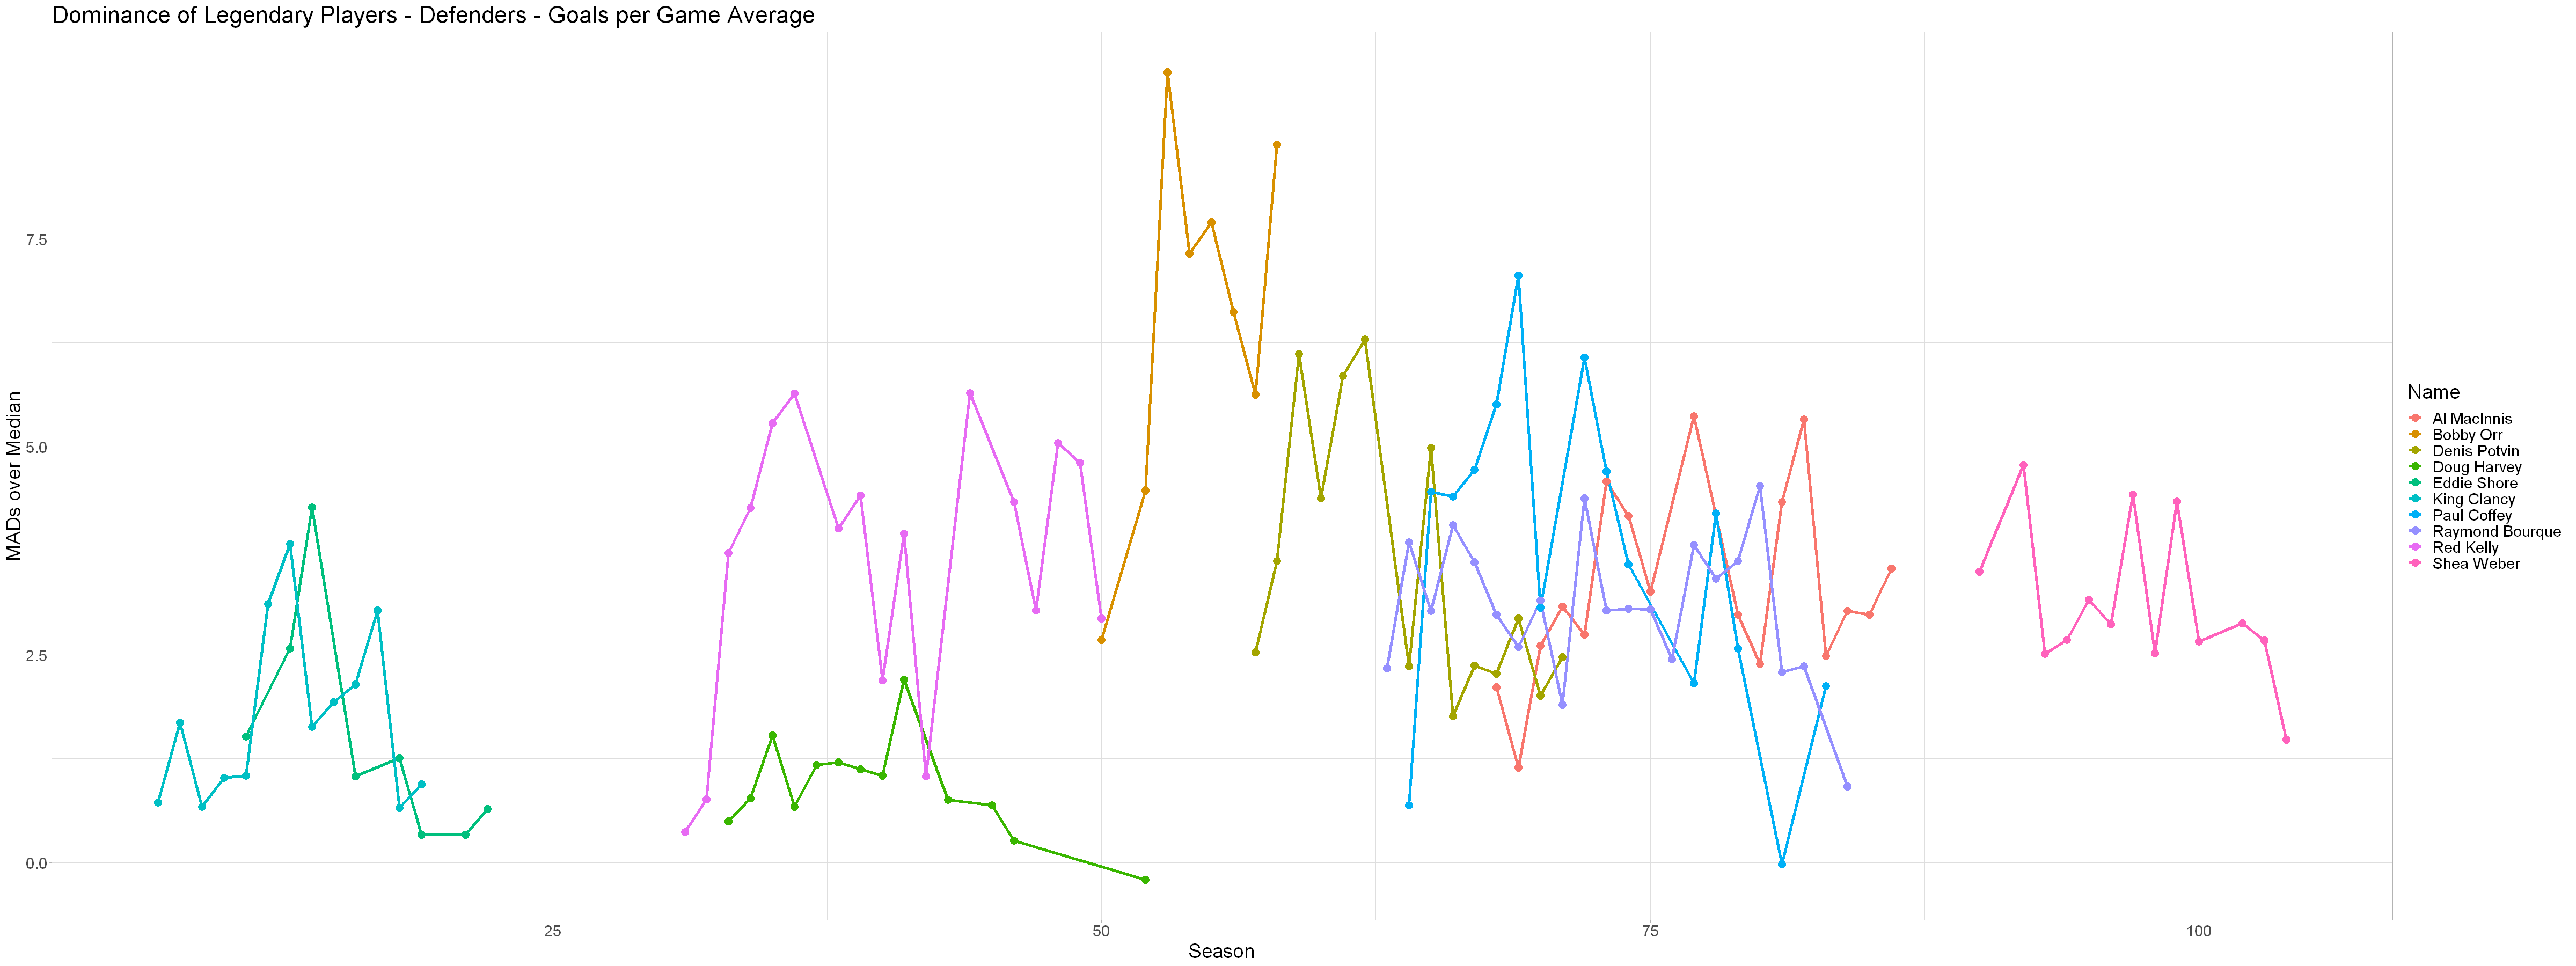

In [274]:
options(repr.plot.width = 40, repr.plot.height = 15)
defense_legends <- c("Bobby Orr", "Paul Coffey", "Raymond Bourque", "Shea Weber", "Denis Potvin", "Al MacInnis", "Red Kelly", "Doug Harvey", "King Clancy", "Eddie Shore")
dominance_g_d %>%
  filter(name %in% defense_legends) %>%
  ggplot(., aes(x = season_id, y = measure, colour = name, group = name)) + 
  labs(
    title = "Dominance of Legendary Players - Defenders - Goals per Game Average", 
    y = "MADs over Median", 
    x = "Season", 
    colour = "Name"
  ) + 
  geom_line(size = 1.5) + 
  geom_point(size = 4) + 
  def_plot_setup 

#### Plus Minus - Defenders

##### Best Seasons

In [269]:
dominance_ps_d <- create_comparative_measure(data, "defense", 1, plus_minus)
head(dominance_ps_d, 10)

rank,name,position,active,gp,g,a,tp,plus_minus,season,team_id,nationality,avg_p,avg_g,mad,median,median_games,measure,season_id
<int>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Mark Howe,D,0,77,24,58,82,85,1985-1986,61,USA,1.0649351,0.31168831,8.8956,0,46.5,9.555286,69
2,Brad McCrimmon,D,0,80,13,43,56,83,1985-1986,61,Canada,0.7000000,0.16250000,8.8956,0,46.5,9.330456,69
3,Bobby Orr,D,0,78,37,102,139,124,1970-1971,137,Canada,1.7820513,0.47435897,13.3434,0,57.0,9.292984,54
4,Vladimir Konstantinov,D,0,81,14,20,34,60,1995-1996,87,Russia,0.4197531,0.17283951,7.4130,0,49.0,8.093889,79
5,Chris Pronger,D,0,81,9,27,36,47,1997-1998,84,Canada,0.4444444,0.11111111,5.9304,0,50.0,7.925266,81
6,Mark Howe,D,0,69,15,43,58,57,1986-1987,61,USA,0.8405797,0.21739130,7.4130,-1,55.0,7.824093,70
7,Brian Engblom,D,0,76,4,29,33,78,1981-1982,50,Canada,0.4342105,0.05263158,10.3782,-1,47.0,7.612110,65
8,Larry Robinson,D,0,77,19,66,85,120,1976-1977,50,Canada,1.1038961,0.24675325,16.3086,-2,55.0,7.480716,60
9,Scott Stevens,D,0,83,18,60,78,53,1993-1994,3364,Canada,0.9397590,0.21686747,7.4130,-1,48.0,7.284500,77


##### Highest Career Averages

In [270]:
career_ps_dominance_d <- create_career_measure(dominance_ps_d)
head(career_ps_dominance_d, 10)

name,measure,n
<chr>,<dbl>,<int>
Vladimir Konstantinov,4.155613,6
Mark Howe,3.428807,11
Charlie McAvoy,3.365300,6
Brad McCrimmon,3.293613,16
Larry Robinson,3.288850,19
Nicklas Lidström,3.194276,20
Raymond Bourque,2.973571,21
Matt Grzelcyk,2.891113,6
Craig Muni,2.825367,9


Warning message:
"Removed 1 row containing missing values (`geom_line()`)."
Warning message:
"Removed 1 rows containing missing values (`geom_point()`)."


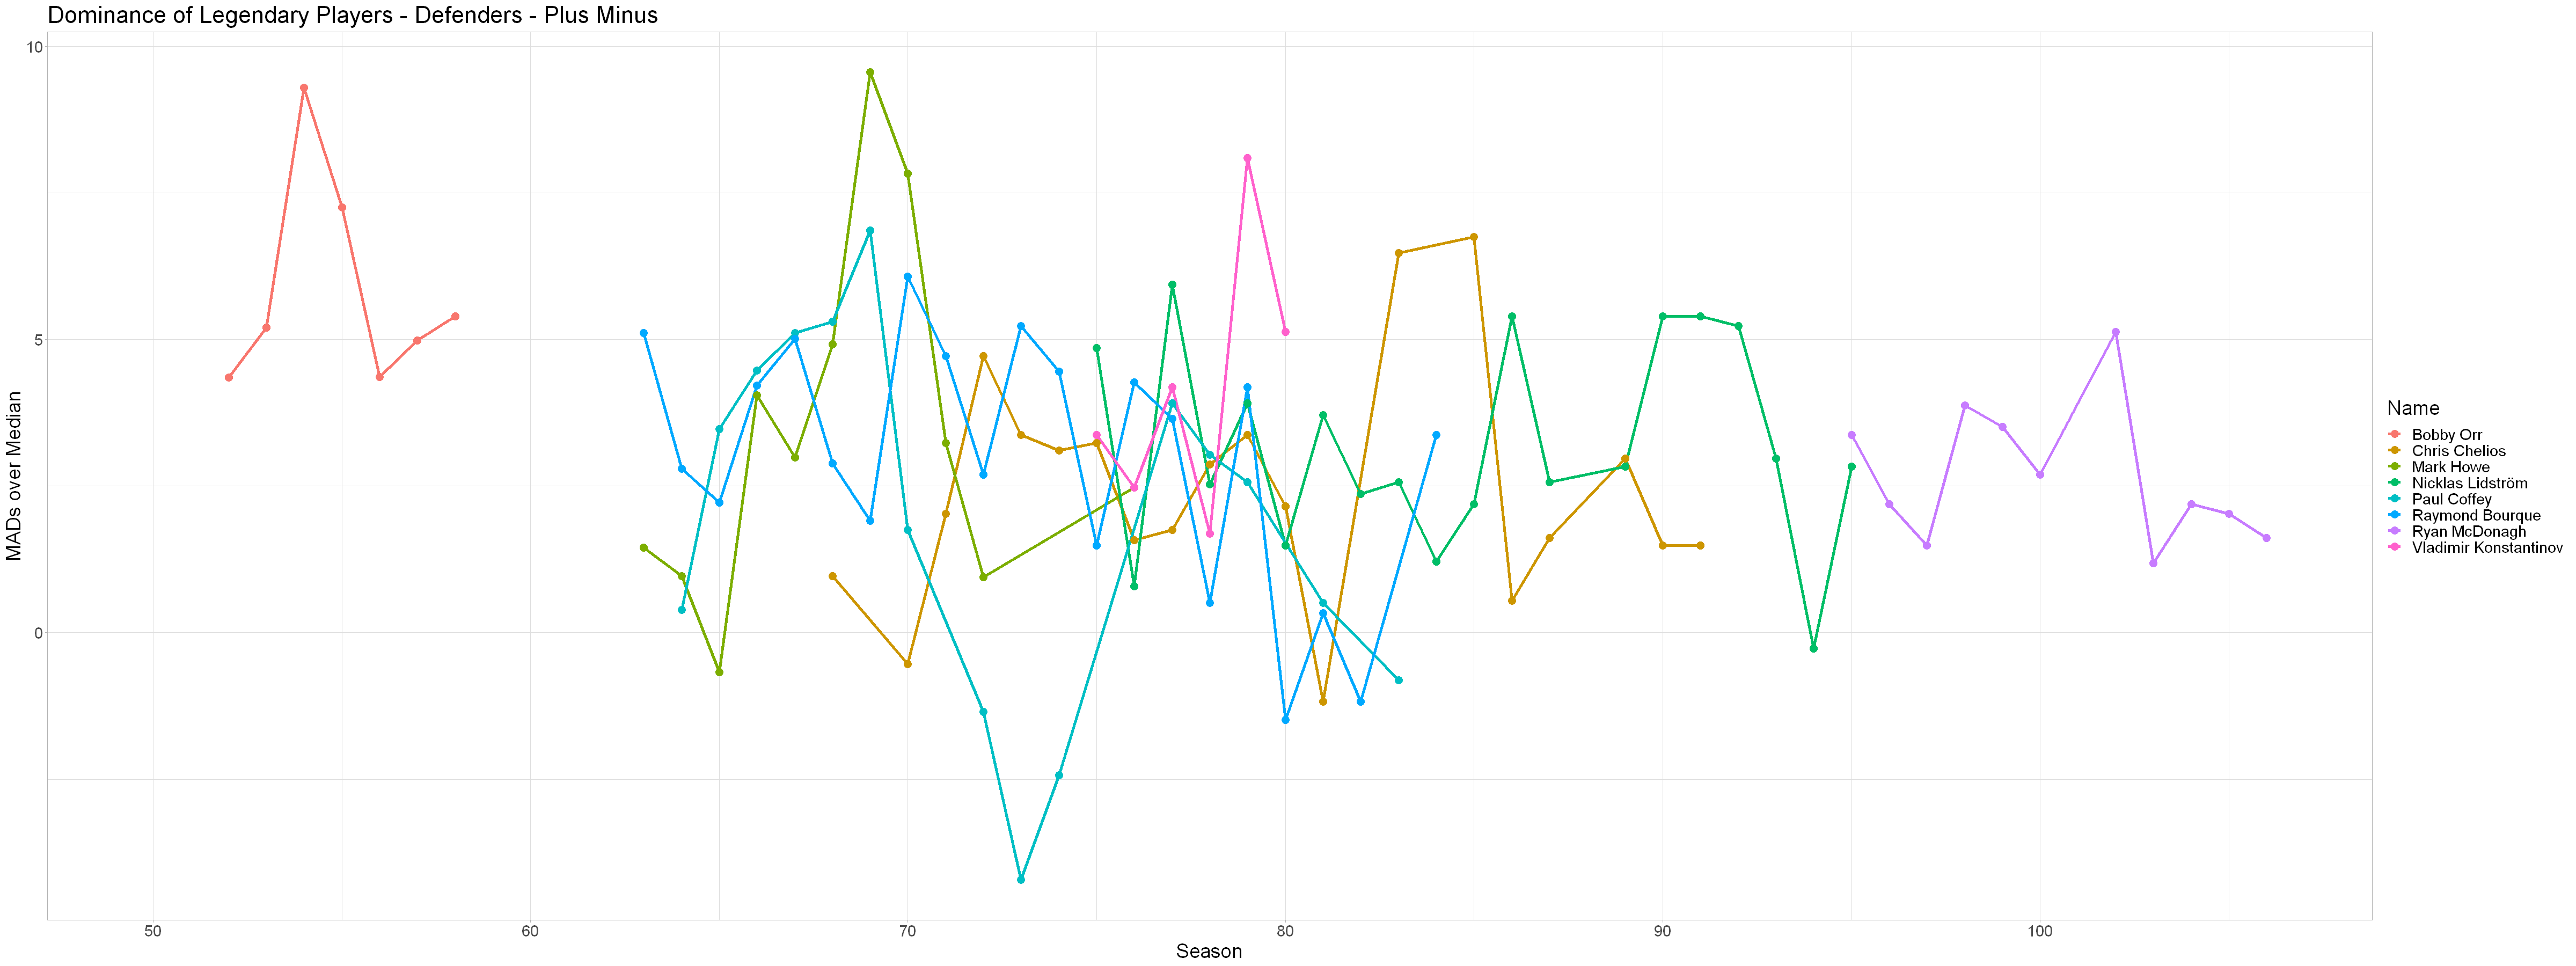

In [225]:
options(repr.plot.width = 40, repr.plot.height = 15)
defense_legends <- c("Bobby Orr", "Paul Coffey", "Raymond Bourque", "Vladimir Konstantinov", "Mark Howe", "Nicklas Lidström", "Chris Chelios", "Ryan McDonagh")
dominance_ps_d %>%
  filter(name %in% defense_legends) %>%
  ggplot(., aes(x = season_id, y = measure, colour = name, group = name)) + 
    labs(
      title = "Dominance of Legendary Players - Defenders - Plus Minus", 
      y = "MADs over Median", 
      x = "Season", 
      colour = "Name"
    ) + 
    geom_line(size = 1.5) + 
    geom_point(size = 4) + 
    def_plot_setup 

### Career Statistical Leaders Through Time

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"

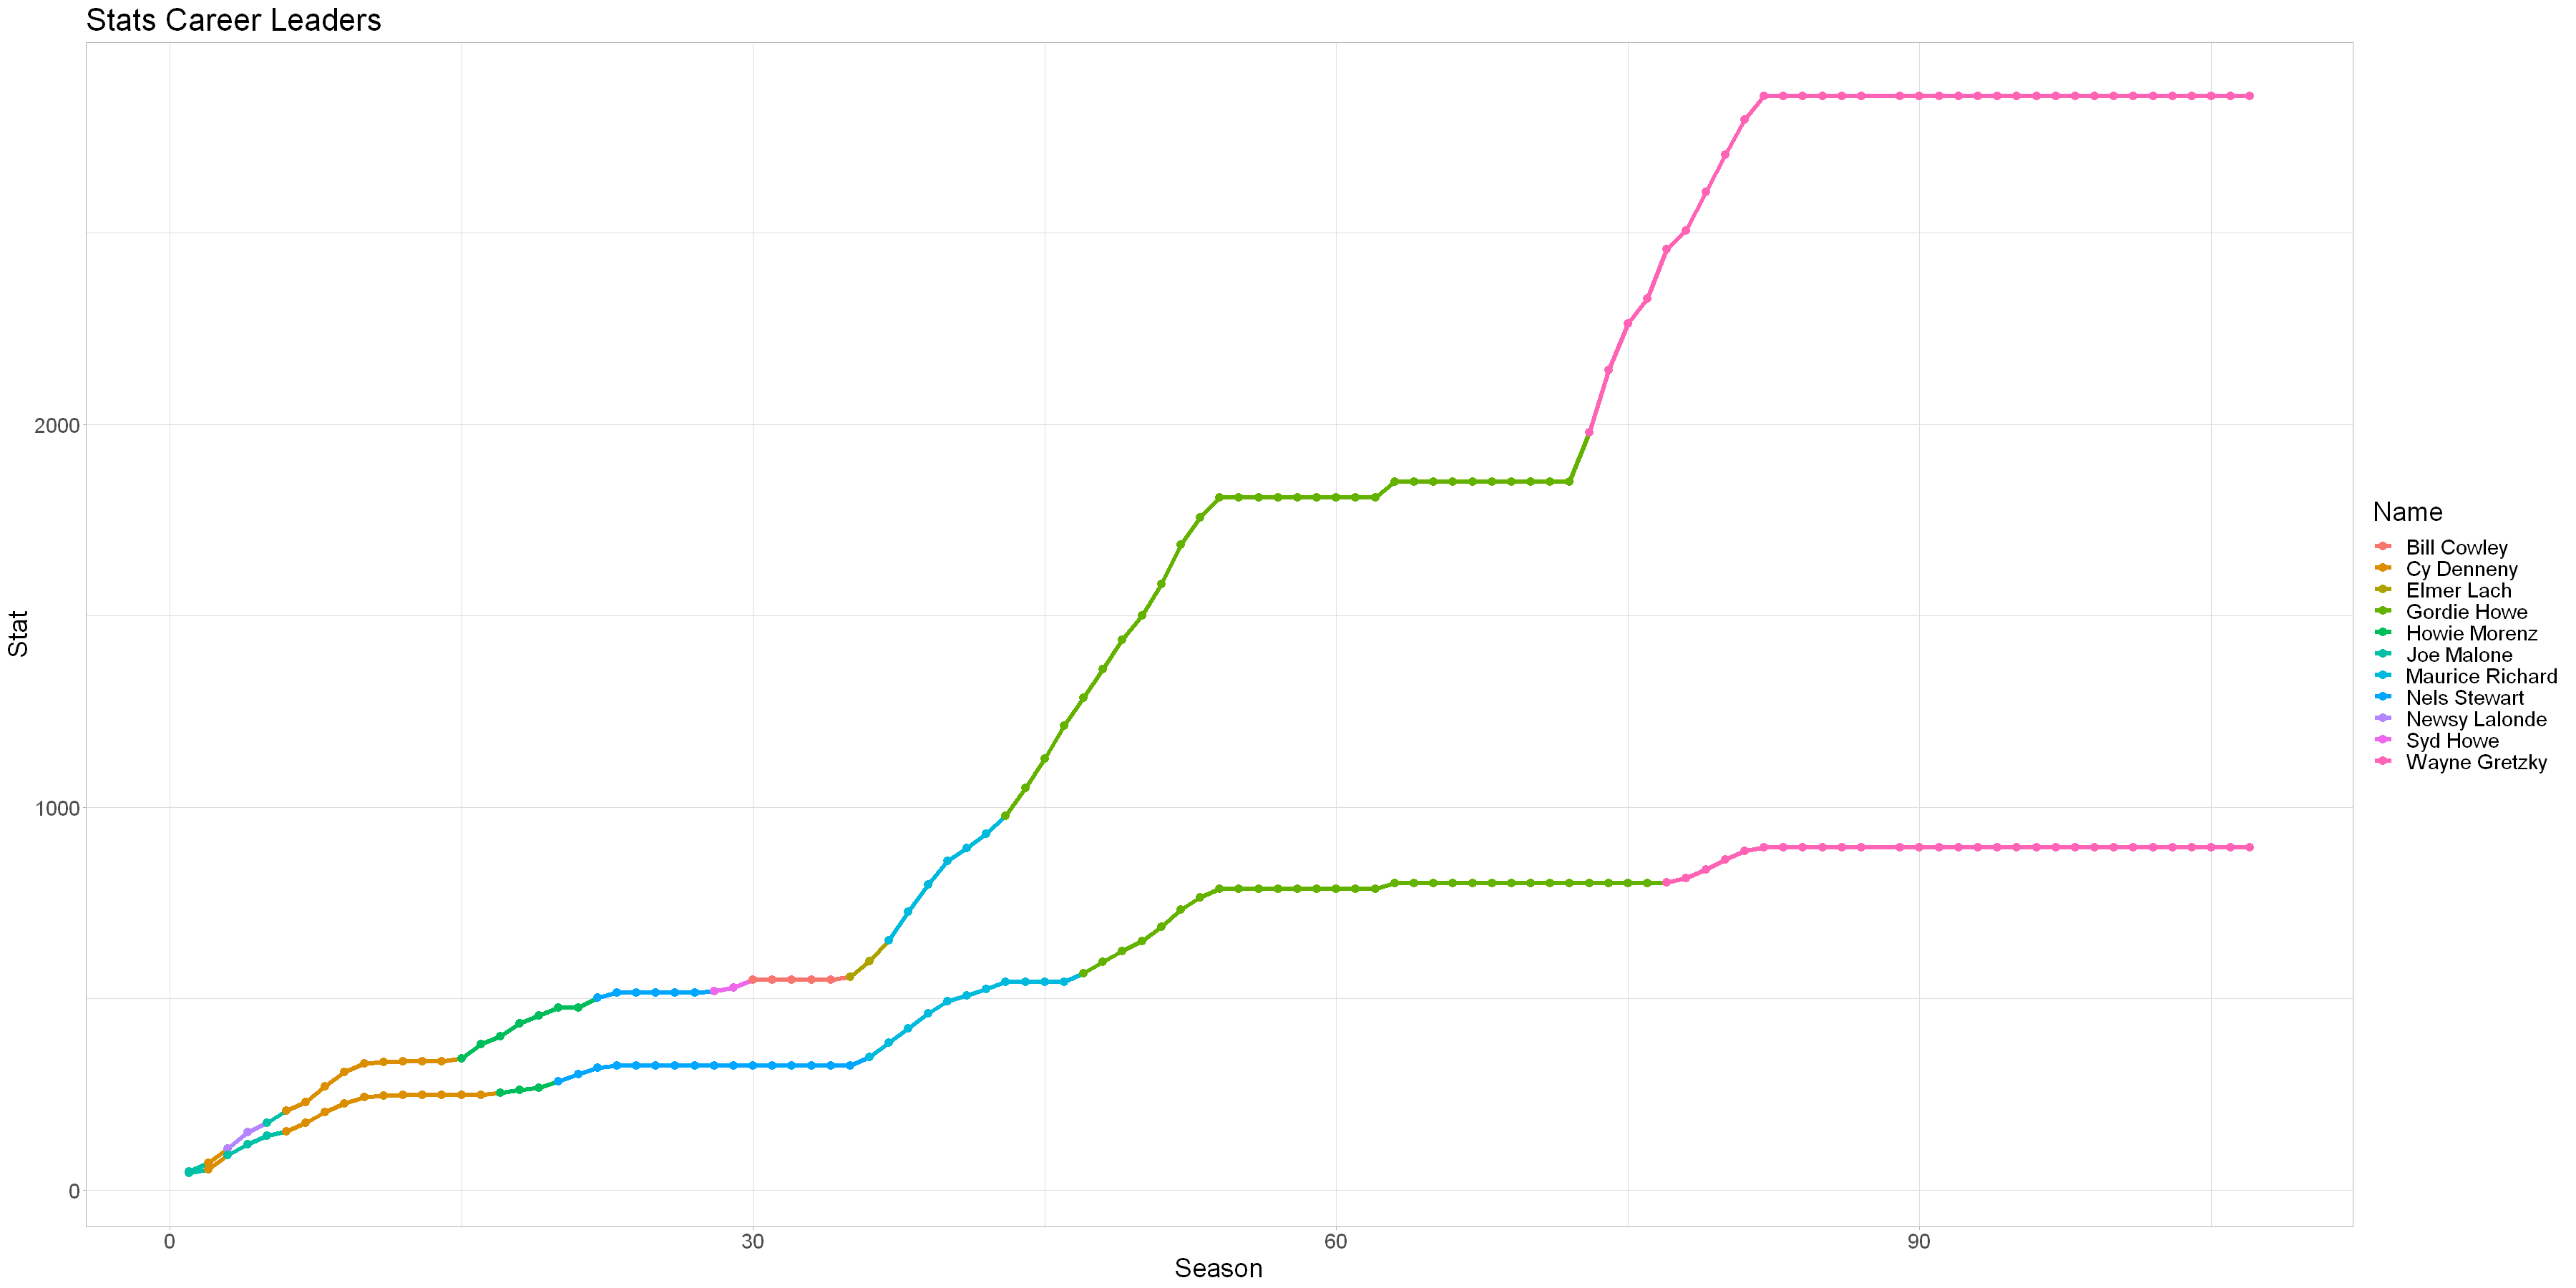

In [254]:
cum_sum <- player_data %>%
  filter(regular_season == 1) %>%
  group_by(name) %>%
  arrange(season_id) %>%
  mutate(cs_tp = cumsum(tp), cs_g = cumsum(g)) 

record_tp_1 <- cum_sum %>%
  group_by(season_id) %>%
  summarize(record_tp = max(cs_tp, na.rm=TRUE)) %>%
  left_join(
    cum_sum_tp, 
    by = join_by(record_tp == cs_tp, season_id == season_id)
    ) %>%
  select(season_id, name, record_tp, tp)

record_g <- cum_sum %>%
  group_by(season_id) %>%
  summarize(record_g = max(cs_g, na.rm = TRUE)) %>%
  left_join(cum_sum, by = join_by(record_g == cs_g, season_id == season_id)) %>%
  select(season_id, name, record_g, g)

for (ind in 2:nrow(record_tp_1)) {
  if (record_tp_1[ind - 1, 3] > record_tp_1[ind, 3]) {
    record_tp_1[ind, 3] <- record_tp_1[ind - 1, 3]
    record_tp_1[ind, 2] <- record_tp_1[ind - 1, 2]
  }
}
for (ind in 2:nrow(record_g)){
  if (record_g[ind - 1, 3] > record_g[ind, 3]) {
    record_g[ind, 3] <- record_g[ind - 1, 3]
    record_g[ind, 2] <- record_g[ind - 1, 2]
  }
}

record_all <- record_tp_1 %>%
  left_join(record_g, by = "season_id")

record_all %>%
  ggplot(., aes(x = season_id, y = record_tp, group = 1, colour = name.x))+
  geom_line(size = 1.75) + 
  geom_point(size = 3, aes(x = season_id, y = record_tp, colour = name.x)) + 
  geom_line(aes(x = season_id, y = record_g, group = 1, colour = name.y), size = 1.75) + 
  geom_point(size = 3, aes(x = season_id, y = record_g, colour = name.y)) + 
  def_plot_setup +
  labs(title = "Stats Career Leaders", x = "Season", y = "Stat", colour = "Name") 


Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"

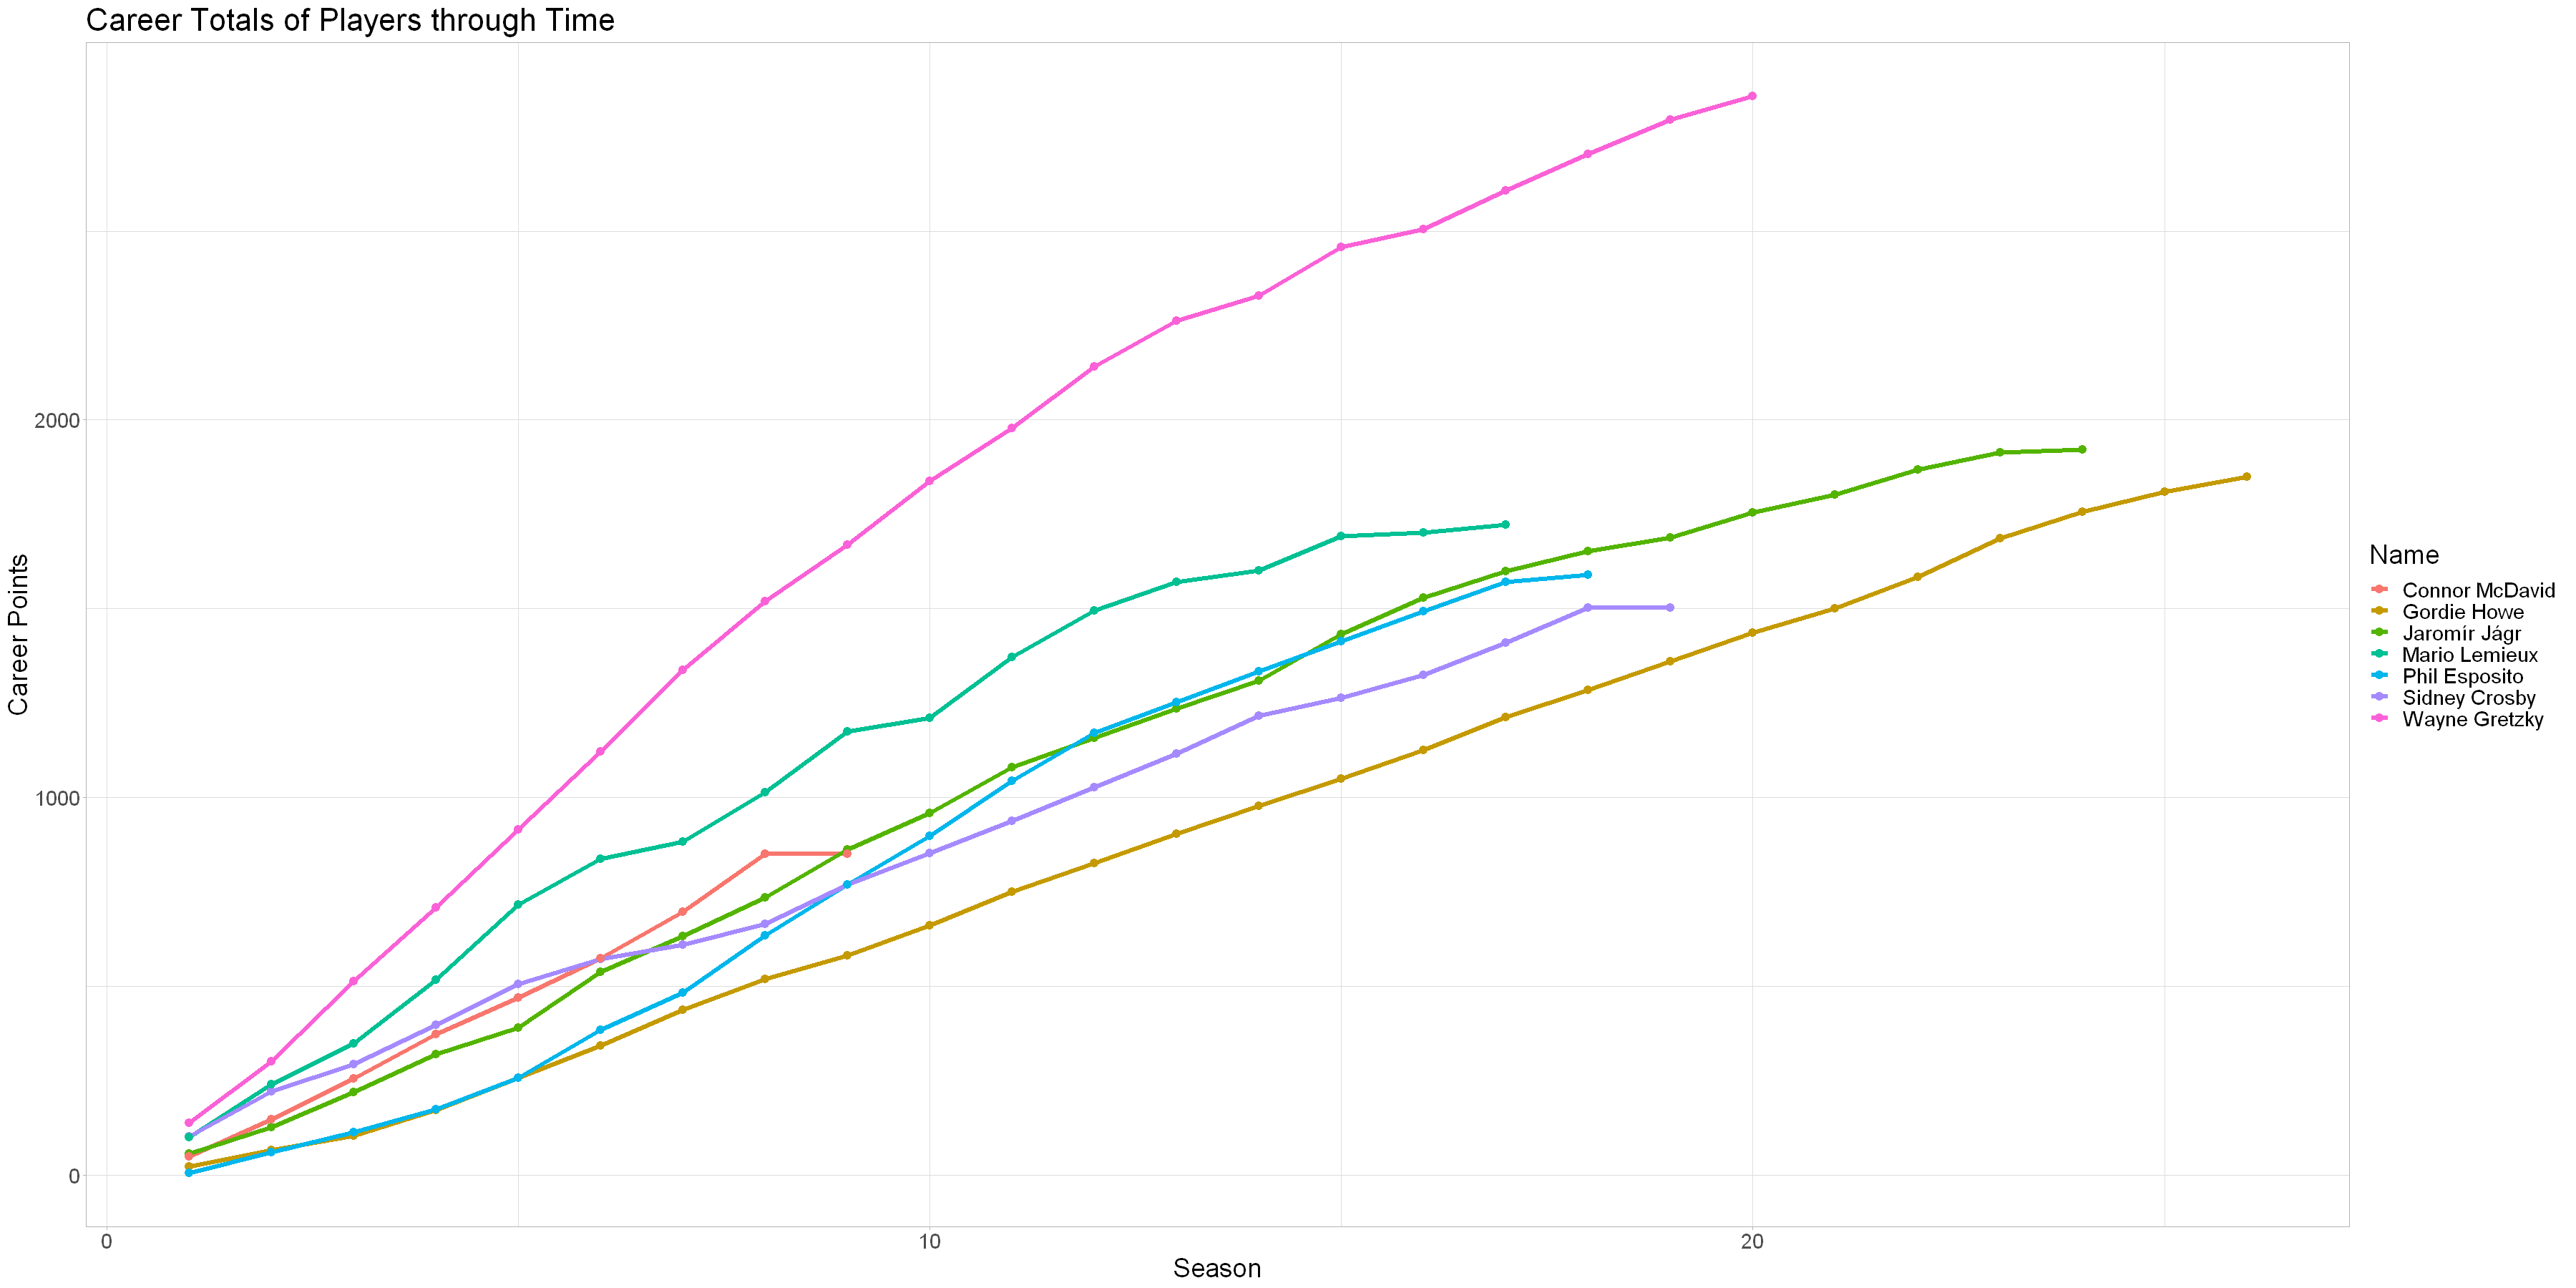

In [273]:
players_include <- c("Mario Lemieux", "Wayne Gretzky", "Gordie Howe", "Connor McDavid", "Jaromír Jágr", "Sidney Crosby", "Phil Esposito")
player_data %>%
  filter(regular_season == 1) %>%
  group_by(name) %>%
  mutate(season_player = row_number(season_id)) %>%
  group_by(name) %>%
  mutate(cum_tp = cumsum(tp)) %>%
  filter(name %in% players_include) %>%
ggplot(., aes(x = season_player, y = cum_tp, colour = name)) + 
  geom_line(size = 1.75) + 
  geom_point(size = 3) + 
  def_plot_setup +
  labs(
    title = "Career Totals of Players through Time", 
    x = "Season", 
    y = "Career Points", 
    colour ="Name"
  )